# Exploring National Library of Scotland - Broadsides

### About the *Scottish Broadsides 1650-1910* Dataset
Broadsides are single sheet items printed on one side only; they were designed to be read unfolded and posted up in public places. They were originally used for the printing of royal proclamations, acts, and official notices. From the second half of the 17th century onwards they became a format widely used for political agitation and were an essential part of printed popular culture, reporting on current hot topics of conversation and scandalous events, such as: violent crimes, the trial and scaffold speeches of convicted criminals, prize fights, mysterious apparitions etc. They also reproduced the words of popular ballads.

This dataset comprises nearly 1,800 broadsides printed in Scotland. They have been acquired by the National Library since 1925; many of them form part of the Lauriston Castle Collection, which was bequeathed to the Library in 1926.
  
* Data format: digitised text
* Data creation process: Optical Character Recognition (OCR)
* Data source: https://data.nls.uk/data/digitised-collections/broadsides-printed-in-scotland/
***
### Table of Contents
0. [Preparation](#0.-Preparation)
1. [Data Cleaning and Standardisation](#1.-Data-Cleaning-and-Standardisation)
2. [Summary Statistics](#2.-Summary-Statistics)
3. [Exploratory Analysis](#3.-Exploratory-Analysis)
4. [Exploring the Location Data](#4.-Exploring-the-Location-Data)
5. [Exploring the Metadata](#5.-Exploring-the-Metadata)
6. [Hypotheses and Reflection](#6.-Hypotheses-and-Reflection)
***
### Citations
* Alex, Beatrice and Llewellyn, Clare. (2020) *Library Carpentry: Text & Data Mining*. Centre for Data, Culture & Society, University of Edinburgh. http://librarycarpentry.org/lc-tdm/.
* Bird, Steven and Klein, Ewan and Loper, Edward. (2019) *Natural Language Processing with Python – Analyzing Text with the Natural Language Toolkit*.  O'Reilly Media. 978-0-596-51649-9. https://www.nltk.org/book/.
* National Library of Scotland. Exploring Edinburgh Ladies’ Debating Society. National Library of Scotland, 2020. https://doi.org/10.34812/0d3w-zt02

### 0. Preparation
Import libraries to use for cleaning, summarising and exploring the data:

In [1]:
# To prevent SSL certificate failure
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

# Libraries for data loading
import pandas as pd
import numpy as np
import string
import re

from collections import defaultdict
import urllib.request
import urllib
import json

# Libraries for visualization
import altair as alt
import matplotlib.pyplot as plt

# Libraries for text analysis
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
from nltk.corpus import PlaintextCorpusReader
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.text import Text
from nltk.stem.porter import PorterStemmer 
from nltk.probability import FreqDist
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
nltk.download('tagsets')  # part of speech tags
from nltk.draw.dispersion import dispersion_plot as displt

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /home/jovyan/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


As our primary dataset of the *Scottish Broadsides* is text files, we will analyse the text itself using the **Natural Language Toolkit (NLTK)**, a library written for the programming language Python.

The Broadsides were acquired by the National Library of Scotland, and the images scanned and digitised into TXT files using OCR. The nls-text-broadsides folder (downloadable as *Just the text* data from the website at the top of this notebook) contains individual TXT files of digitised numerical names, as well as a CSV inventory file and a TXT ReadMe file.  The nlt-text-broadsides folder cannot be uploaded, as each TXT file would have to be uploaded individually. Therefore, I have compressed the folder, and will unzip the contents into the same directory:

In [2]:
import zipfile
with zipfile.ZipFile('nls-text-broadsides.zip', 'r') as zip_ref:
    zip_ref.extractall()

I will then load only the TXT files of digitised text from the nls-text-broadsides folder, and **tokenise** the text (which splits running text into separate words, numbers, and punctuation):

In [3]:
broadsides_folder = 'nls-text-broadsides/'
wordlists = PlaintextCorpusReader(broadsides_folder, '\d.*', encoding='latin1')
broadsides_tokens = wordlists.words()
print(broadsides_tokens[:10])

len(broadsides_tokens)

['The', 'SECOND', 'PART', 'Of', 'the', 'Last', 'SPEECH', ',', 'Confession', 'and']


1195054

The first 10 tokens make it look like the OCR digitilisation has been pretty accurate, but this could just be luck that this section doesn't contain any errors.

Let's look at one of these words in context to see if they make sense.  To see phrases in which "Edinburgh" is used, we can use the `concordance()` method:

In [4]:
t = Text(broadsides_tokens)
t.concordance('Edinburgh', lines=20)

Displaying 20 of 973 matches:
ord to send an old comerade out of Edinburgh to converse with me , for he could
n of W . BURKE , who was hanged at Edinburgh on Wednesday the 28th January , 18
on Wednesday morning , the Town of Edinburgh was filled with an immense croud o
tenced to be taken to the Cross of Edinburgh , and hanged on a gibbet till he b
en sentenced him to be executed at Edinburgh on the 28 th day of Jaunary 1829 .
own Child , in the Grass Market of Edinburgh , January 21st . 1702 . OH ! Oh ! 
ovost Spittal !! Waugh , Printer , Edinburgh . IN HERIOT ' s - WALKS , & c . A 
 Heart my coming Joy . F I N I S . Edinburgh , Printed and sold by John Reid , 
Is her ain son Frank Jeffrey . O ' Edinburgh birth and parentage , ' Mong us he
s , make haste , make haste away . Edinburgh , Printed and fold by . John Reid 
 A FAMILIAR EPISTLE FROM DUDLEY TO EDINBURGH . SIR JOHN is a dangerous manâ  
 S COMIN ' SUNE , MY BOYS ! ( From Edinburgh Evening Courant of 17th June 1871 
erry Dialo

973 matches is a lot, but not surprising, as this was where many of the Broadsides would have been published. Lets explore a more obscure word to see how that looks:

In [5]:
t.concordance('political', lines=20)

Displaying 15 of 15 matches:
shed by a greater quantity of vile political JOBS than any other period of equa
 March ." DEDICATED TO THE GLASGOW POLITICAL UNION . O waesucks , for Peter the
aly and white ! If any one asks my political creed , I answer , ' tis one which
rt in sweet Nether Mill Glen . NEW POLITICAL SONG , All about John Murray , the
 to judge by the rules of moral or political fitness ; it not being prudent for
ounds altogether independent of my political principles or of my mental qualifi
ary union of talent , industry and political consistency which has raised him t
dent and Secretary of the Trades ' Political Union , requested the Delegates be
ndon is the scene of extraordinary political and mercurial schemes . FEBRUARY .
 Professor â  differs from me in political opinions but it cannot be helped .
, and the perfect configuration of political affairs , What shall eventually ha
er or influence every person whose political sentiments differs in the slightes
 his bill ,

15 matches shows that the word 'political' was not nearly as common. However, we have to remember that this recognition is specific, and would not pick up on other similar words, such as *politics* or *politician*.

In [6]:
t.concordance('politics', lines=20)

Displaying 6 of 6 matches:
 To cope wi ' Francis Jeffrey . In politics his views are clear ; Oppression '
 brig hae I ;" But aye they say my politics And me are all awry . II . Oh ! gi
; But thou , Oh Lochiel , were thy politics right , Thy flag would be still on
aim your Votes . Unacquainted with Politics , I pray you to entrust to me the 
 degree from my own . Q . But have politics any thing to do with the Town Coun
ikely that an account of our Burgh Politics may afford you some gratification 


In [7]:
t.concordance('politician', lines=20)

Displaying 1 of 1 matches:
his own . Q . Why is our Priest a politician ? A . ' Cause he came here on tha


From these searches, we can also see that some of the words have either been incorrectly digitised by OCR, or are potentially Old English words, or words from the Scots language. Additionally, we can see that they used past tense words differently from how we do now: where we say "filled" they would say "fill'd".

This dataset has not been manually cleaned after OCR digitised text from the *Broadsides* collection so it's not surprising to see some non-words appear in the concordance.  Even with the digitisation errors, though, we can still get a sense of what's in the text using natural language processing (NLP) methods!

#### 0.1 Dataset Size
Before we start analysing, let's get a sense of how much data we're working with:

In [8]:
def corpusStatistics(plaintext_corpus_read_lists):
    total_chars = 0
    total_tokens = 0
    total_sents = 0
    total_files = 0
    
    # fileids are the TXT file names in the nls-text-broadsides folder:
    for fileid in plaintext_corpus_read_lists.fileids():
        total_chars += len(plaintext_corpus_read_lists.raw(fileid))
        total_tokens += len(plaintext_corpus_read_lists.words(fileid))
        total_sents += len(plaintext_corpus_read_lists.sents(fileid))
        total_files += 1
    
    print("Total...")
    print("  Characters in Broadsides Data:", total_chars)
    print("  Tokens in Broadsides Data:", total_tokens)
    print("  Sentences in Broadsides Data:", total_sents)
    print("  Files in Broadsides Data:", total_files)

corpusStatistics(wordlists)

Total...
  Characters in Broadsides Data: 5568640
  Tokens in Broadsides Data: 1195054
  Sentences in Broadsides Data: 45680
  Files in Broadsides Data: 1726


We can see that we have a very large dataset. We know that the function is working, because we already know that we have 1726 files. Here, it says that we have 45680 sentences - remember this for later on!

The NLTK ``.words()`` method says that we have 1,195,054 words, but I have printed this as ``Tokens``, rather than words. This is because words in NLTK include punctuation and numbers, in addition to letters.

#### 0.2 Identifying Subsets of the Data
The main question that I am investigating in the data is how **places** and **locations** vary throughout *The Broadsides*. Therefore, I am going to create two subsets of the data, one of the entire *Broadsides* collection, and one focusing on those Broadsides mentioning *locations*.  

To do so we first need to load the inventory (CSV file) that lists which file name corresponds with which Broadside.    When you open the inventory in Microsoft Excel or a text editor, you can see that there are no column names.  The Python library [Pandas](https://pandas.pydata.org/docs/), which can read CSV files, calls column names the ``header``.  When we use Pandas to read the inventory, we'll create our own header by specifying ``header=None`` and providing a list of column ``names``.

When Pandas (abbreviated ``pd`` when we loaded libraries in the first cell of this notebook) reads a CSV file, it creates a table called a **dataframe** from that data.  Let's see what the Broadsides inventory dataframe looks like:

In [9]:
df = pd.read_csv('nls-text-broadsides/broadsides-inventory.csv', header=None, names=['fileid', 'title'])
df

,fileid,title
0,74459405.txt,Praise of the weavers - Ry.III.a.10(78)
1,74459849.txt,"Slippy Stane', 'The Scotch Brigade', 'Somewher..."
2,74572646.txt,Proper new ballad in praise of the gallant wea...
3,74458970.txt,Rise up noble Britons - RB.m.169(109)
4,74459015.txt,"Rare new song, shewing the bravery of His Grac..."
...,...,...
1721,74460659.txt,"Verses on the melancholy death of John White, ..."
1722,74460673.txt,"Letter from a gentleman in Forfar, to his frie..."
1723,74460841.txt,Account of the trial and sentence of D. McInne...
1724,74460862.txt,True and full account of the sad and deplorabl...


As we have 1726 files (with indeces running from 0 through 1725), we won't print the entire dataframe.  We can specifically see the first 5 rows using ``df.head()``:

In [10]:
df.head()

,fileid,title
0,74459405.txt,Praise of the weavers - Ry.III.a.10(78)
1,74459849.txt,"Slippy Stane', 'The Scotch Brigade', 'Somewher..."
2,74572646.txt,Proper new ballad in praise of the gallant wea...
3,74458970.txt,Rise up noble Britons - RB.m.169(109)
4,74459015.txt,"Rare new song, shewing the bravery of His Grac..."


Now we can create a dictionary of file IDs and their associated journal titles for the *Broadsides* data:

In [11]:
broadsides = {}
for index, row in df.iterrows():
    fileid = row['fileid']
    title = row['title']
    broadsides[fileid] = title

print("The Broadsides:")
print(broadsides)


The Broadsides:
{'74459405.txt': 'Praise of the weavers - Ry.III.a.10(78)', '74459849.txt': "Slippy Stane', 'The Scotch Brigade', 'Somewhere the Sun is Shining', 'Nancy Whisky', and 'The Nameless Lassie - RB.m.143(125)", '74572646.txt': 'Proper new ballad in praise of the gallant weavers - Ry.III.a.10(23)', '74458970.txt': 'Rise up noble Britons - RB.m.169(109)', '74459015.txt': 'Rare new song, shewing the bravery of His Grace the Duke of Argile - Ry.III.a.10(86)', '74459065.txt': 'Battle of Inkermann - L.C.Fol.70(232)', '74459083.txt': "Bonnets o' blue - L.C.1269(253)", '74459111.txt': "Britain's triumph; or, The Dutch well dressed - ABS.10.203.1(29)ABS.10.203.01(29)", '74459254.txt': 'Jamie Foyers - L.C.Fol.178A.2(80)/L.C.fol.178A.2(080)', '74459269.txt': "Jockie's far awa - L.C.Fol.70(007)", '74459293.txt': 'Let me like a soldier fall - L.C.Fol.70(124)', '74459312.txt': 'Lowlands low - L.C.Fol.70(222)', '74459413.txt': 'Red, white and blue - L.C.Fol.178A.2(015)', '74459415.txt': "Ri

For convenient reference of only file IDs, we can also create a list from that dictionary, which contains only the file IDs:

In [12]:
broadsides_ids = list(broadsides.keys())

print(broadsides_ids)

['74459405.txt', '74459849.txt', '74572646.txt', '74458970.txt', '74459015.txt', '74459065.txt', '74459083.txt', '74459111.txt', '74459254.txt', '74459269.txt', '74459293.txt', '74459312.txt', '74459413.txt', '74459415.txt', '74459420.txt', '74459435.txt', '74459484.txt', '74459528.txt', '74459539.txt', '74459555.txt', '74459594.txt', '74459595.txt', '74459671.txt', '74459673.txt', '74459674.txt', '74459680.txt', '74459741.txt', '74459779.txt', '74459801.txt', '74459822.txt', '74459825.txt', '74460000.txt', '74460409.txt', '74460472.txt', '74460476.txt', '74460857.txt', '74459905.txt', '74459906.txt', '74459907.txt', '74459909.txt', '74459912.txt', '74459913.txt', '74459915.txt', '74459918.txt', '74459921.txt', '74459922.txt', '74459927.txt', '74459930.txt', '74459931.txt', '74459932.txt', '74459935.txt', '74459936.txt', '74459938.txt', '74459939.txt', '74459956.txt', '74459961.txt', '74459983.txt', '74460032.txt', '74460073.txt', '74460273.txt', '74460281.txt', '74460282.txt', '744602

NLTK stores the lists of tokens in the `broadsides_tokens` variable we created by the file IDs, so it's useful to be able to match the file IDs with their journal titles!

#### 0.4 Creating a 'locations' subset of the data

To explore the question of the Broadsides locations, we also want to create a similar dataframe, but just containing the Broadsides that mention particular locations.

I can start investigating this by looking at the locations that were mentioned in the **titles** of the Broadsides. First I am going to create a **list** from the 'scotland_places' text file. I created this text file from the list of Scottish towns on https://www.usp.scot/Browse/AZ 

I will `open` the text file in *read* format in `pandas` (`r`) and split it at each new line using '`\n`'.

In [13]:
# Opening the text file in read format
locations_file = open('scotland_places.txt', 'r')
# Convert the file into a list, and splitting at each new line
locations_txt = locations_file.read().split('\n')
locations_txt

['Aberchirder',
 'Aberdeen',
 'Aberdour',
 'Aberfeldy',
 'Aberlady',
 'Abernethy',
 'Aboyne',
 'Addiebrownhill',
 'Airdrie',
 'Airth',
 'Alexandria',
 'Alford',
 'Allanton',
 'Alloa',
 'Almondbank',
 'Alness',
 'Alva',
 'Alyth',
 'Annan',
 'Anstruther',
 'Arbroath',
 'Ardersier',
 'Ardrishaig',
 'Ardrossan',
 'Armadale',
 'Ashgill',
 'Auchinleck',
 'Auchterarder',
 'Auchtermuchty',
 'Aviemore',
 'Avoch',
 'Ayr',
 'Balfron',
 'Balintore',
 'Ballater',
 'Ballingry, Lochore and Crosshill',
 'Balloch',
 'Balmedie',
 'Balmullo',
 'Banavie and Corpach',
 'Banchory',
 'Banff',
 'Bankfoot',
 'Banknock',
 'Bannockburn',
 'Bargeddie',
 'Barrhead',
 'Bathgate',
 'Bearsden',
 'Beauly',
 'Beith',
 'Bellsbank',
 'Bellshill',
 'Biggar',
 'Bilston',
 'Birkhill and Muirhead',
 'Bishopbriggs',
 'Bishopton',
 'Blackburn (Aberdeenshire)',
 'Blackburn (West Lothian)',
 'Blackridge',
 'Blairgowrie',
 'Blantyre',
 'Boddam',
 "Bo'ness",
 'Bonhill',
 'Bonnybridge',
 'Bonnyrigg',
 'Bothwell',
 'Brechin',
 'Brid

We now have a list of all the Scottish towns. There appears to be an empty *string* at the end of the list (**string** is Python's data format for text), this will create errors when I am trying to find out which titles include words from the list. Therefore I will remove it using ``.pop()``:

In [14]:
locations_txt.pop()

''

Lets print the list again to see that it looks as expected:

In [15]:
locations_txt

['Aberchirder',
 'Aberdeen',
 'Aberdour',
 'Aberfeldy',
 'Aberlady',
 'Abernethy',
 'Aboyne',
 'Addiebrownhill',
 'Airdrie',
 'Airth',
 'Alexandria',
 'Alford',
 'Allanton',
 'Alloa',
 'Almondbank',
 'Alness',
 'Alva',
 'Alyth',
 'Annan',
 'Anstruther',
 'Arbroath',
 'Ardersier',
 'Ardrishaig',
 'Ardrossan',
 'Armadale',
 'Ashgill',
 'Auchinleck',
 'Auchterarder',
 'Auchtermuchty',
 'Aviemore',
 'Avoch',
 'Ayr',
 'Balfron',
 'Balintore',
 'Ballater',
 'Ballingry, Lochore and Crosshill',
 'Balloch',
 'Balmedie',
 'Balmullo',
 'Banavie and Corpach',
 'Banchory',
 'Banff',
 'Bankfoot',
 'Banknock',
 'Bannockburn',
 'Bargeddie',
 'Barrhead',
 'Bathgate',
 'Bearsden',
 'Beauly',
 'Beith',
 'Bellsbank',
 'Bellshill',
 'Biggar',
 'Bilston',
 'Birkhill and Muirhead',
 'Bishopbriggs',
 'Bishopton',
 'Blackburn (Aberdeenshire)',
 'Blackburn (West Lothian)',
 'Blackridge',
 'Blairgowrie',
 'Blantyre',
 'Boddam',
 "Bo'ness",
 'Bonhill',
 'Bonnybridge',
 'Bonnyrigg',
 'Bothwell',
 'Brechin',
 'Brid

Ok, so now we have a clean list containing places in Scotland which we have called ``locations_txt``. We now want to create a dictionary of all the *Broadsides* text files that contain one of these place names in their title. To do this we need to iterate through the *broadsides_inventory* dataframe, as we did above. However, this time we only want to add them to the dictionary ``if`` their **title** contains a word in the ``locations_txt`` **list**:

In [16]:
locations = {}
for index, row in df.iterrows():
    fileid = row['fileid']
    title = row['title']

    if any(substring in title for substring in locations_txt):    
        locations[fileid] = title

print('The number of Broadsides that include a location in the title is: ', len(locations))
locations

The number of Broadsides that include a location in the title is:  453


{'74459905.txt': 'Ayr Autumn Circuit - L.C.Fol.73(123)',
 '74459907.txt': 'Circuit Court : Glasgow, 15th Sept. 1828 - L.C.Fol.73(102)',
 '74459909.txt': 'Trials & sentences of all the different prisoners who have stood their trials at the Circuit Court of Justiciary which opened at Glasgow on Monday the 16th September, 1822, when one young man was sentenced to be executed at Glasgow on Wednesday the 23d of - L.C.Fol.73(38)',
 '74459912.txt': 'Account of the trials and sentences of all the different prisoners who have been tried before the Circuit Court of Justiciary which met at Glasgow on Monday September 15, 1828 - L.C.Fol.73(101)',
 '74459913.txt': 'Particular account of the procedure of the Circuit Court of Justiciary held at Glasgow on Tuesday, Wednesday, and Thursday the 19, 20, 21st of September 1786, giving a particular account of the trial and sentence of the different criminals - APS.4.84.21',
 '74459915.txt': 'Account of the trials of the different criminals, in the Circuit 

Looking good! This shows us that 453 of the *Broadsides* titles contain the name of a location in Scotland. This will allow us to get an insight into which places were most discussed. Again, we can create a list of only the file IDs for convenience. This time it might also be useful to create a list of the titles, so we can search it later:

In [17]:
locations_ids = list(locations.keys())
locations_titles = list(locations.values())

print(locations_ids)
print(locations_titles)

['74459905.txt', '74459907.txt', '74459909.txt', '74459912.txt', '74459913.txt', '74459915.txt', '74459918.txt', '74459921.txt', '74459922.txt', '74459927.txt', '74459930.txt', '74459931.txt', '74459932.txt', '74459935.txt', '74459936.txt', '74459938.txt', '74459939.txt', '74459956.txt', '74460032.txt', '74460073.txt', '74460281.txt', '74460283.txt', '74460439.txt', '74460579.txt', '74460580.txt', '74460585.txt', '74460587.txt', '74460591.txt', '74460592.txt', '74460593.txt', '74460595.txt', '74460596.txt', '74460597.txt', '74460598.txt', '74460599.txt', '74460605.txt', '74460607.txt', '74460609.txt', '74460610.txt', '74460611.txt', '74460614.txt', '74460615.txt', '74460616.txt', '74460620.txt', '74460623.txt', '74460626.txt', '74460628.txt', '74460630.txt', '74460631.txt', '74460632.txt', '74460634.txt', '74460636.txt', '74460637.txt', '74460638.txt', '74460639.txt', '74460640.txt', '74460643.txt', '74460646.txt', '74460649.txt', '74460687.txt', '74460803.txt', '74460842.txt', '744608

Finally, we want to create a **dataframe**, like the original *Broadsides* dataframe above containing all the file IDs and titles. This time it will only contain the files that have a *location* named in their title.

In [18]:
title_locations_df = pd.DataFrame(
    {'fileid': locations_ids,
     'title': locations_titles,
    })

title_locations_df

,fileid,title
0,74459905.txt,Ayr Autumn Circuit - L.C.Fol.73(123)
1,74459907.txt,"Circuit Court : Glasgow, 15th Sept. 1828 - L.C..."
2,74459909.txt,Trials & sentences of all the different prison...
3,74459912.txt,Account of the trials and sentences of all the...
4,74459913.txt,Particular account of the procedure of the Cir...
...,...,...
448,74460372.txt,Full and particular account of the loss of the...
449,74460385.txt,Account of the shocking case of Mrs Anderson S...
450,74460386.txt,"Full, true and particular account of that most..."
451,74460392.txt,Full true and particular account of the murder...


We have created a dataframe with a collection of all the Broadsides that have a location mentioned in the title, but it would be helpful to be able to see what that location was. To do this, we will create a function that identifies if words exist as part of a *string*, and to add them to a *list* if they do. We do this as a function so that it can be repeated for every title in the dataframe and create an individual *list* for each row, rather than one long *list* of locations. It will then add these *lists* of locations as a new column on the dataframe.

In [19]:
import numpy as np

# Create a function to see which place name was found in the title and add it to the dataframe in a new column

# Define the function which takes a string and a list of words to extract as inputs
def place_identifier(title, name):
    # Try except to handle np.nans in input
    try:
        # Extract the list of places
        place = [l for l in name if l in title]
        # If any places were extracted then return the list
        if place:
            return place
        # Otherwise return np.nan
        else:
            return np.nan
    except AttributeError:
        return np.nan

# Apply the function to the column
title_locations_df['location'] = title_locations_df['title'].apply(lambda x: place_identifier(x, locations_txt))
title_locations_df

,fileid,title,location
0,74459905.txt,Ayr Autumn Circuit - L.C.Fol.73(123),[Ayr]
1,74459907.txt,"Circuit Court : Glasgow, 15th Sept. 1828 - L.C...",[Glasgow]
2,74459909.txt,Trials & sentences of all the different prison...,[Glasgow]
3,74459912.txt,Account of the trials and sentences of all the...,[Glasgow]
4,74459913.txt,Particular account of the procedure of the Cir...,[Glasgow]
...,...,...,...
448,74460372.txt,Full and particular account of the loss of the...,[Leith]
449,74460385.txt,Account of the shocking case of Mrs Anderson S...,[Leith]
450,74460386.txt,"Full, true and particular account of that most...","[Dunbar, Edinburgh]"
451,74460392.txt,Full true and particular account of the murder...,"[Edinburgh, Musselburgh]"


As the function was creating *lists*, each entry in our **location** column is an individual *list*, which might be hard to work with later on. Therefore, we will create a new column where each list is converted into a *string*:

In [20]:
title_locations_df['location_str'] = [','.join(map(str, l)) for l in title_locations_df['location']]
title_locations_df

,fileid,title,location,location_str
0,74459905.txt,Ayr Autumn Circuit - L.C.Fol.73(123),[Ayr],Ayr
1,74459907.txt,"Circuit Court : Glasgow, 15th Sept. 1828 - L.C...",[Glasgow],Glasgow
2,74459909.txt,Trials & sentences of all the different prison...,[Glasgow],Glasgow
3,74459912.txt,Account of the trials and sentences of all the...,[Glasgow],Glasgow
4,74459913.txt,Particular account of the procedure of the Cir...,[Glasgow],Glasgow
...,...,...,...,...
448,74460372.txt,Full and particular account of the loss of the...,[Leith],Leith
449,74460385.txt,Account of the shocking case of Mrs Anderson S...,[Leith],Leith
450,74460386.txt,"Full, true and particular account of that most...","[Dunbar, Edinburgh]","Dunbar,Edinburgh"
451,74460392.txt,Full true and particular account of the murder...,"[Edinburgh, Musselburgh]","Edinburgh,Musselburgh"


Great, so we have a dataframe containing the file IDs, the title, and the location mentioned in the title. However, the method is not perfect. We can also see here that when there were multiple locations mentioned in one title, they were both added together as one item in the column. This means they will not be recognisable as either location. For example ``Dunbar,Edinburgh`` will not be reocognised as either `Dunbar` or `Edinburgh`, as the algorithm will see it as an entirely new object.

### 1. Data Cleaning and Standardisation

There are several ways to standardise, or "normalise," text, with each way providing data suitable to different types of analysis.  For example, to study the vocabulary of a text, it's useful to remove punctuation and digits, lowercase the remaining alphabetic words, and then reduce those words to their root form (with stemming or lemmatisation - more on this later).  Alternatively, to identify people and places using named entity recognition, it's important to keep capitalisation in words and keep words in the context of their sentences.

#### 1.1 Tokenisation
In the first section [0. Preparation](#0.-Preparation), we tokenised the Broadsides dataset when we created the ``broadsides_tokens`` list.  ``broadsides_tokens`` contains a list of all words, punctuation, and numbers that appear in the Broadsides dataset, separated into individual items and organised in the order they appear in the Broadsides text files.  

Similarly, NLTK also provides methods to tokenise sentences.  This is how we counted the number of sentences in section [0.1 Dataset Size](#0.1-Dataset-Size).

Tokenized words are helpful when analysing the vocabulary of text. Tokenised sentences are helpful when analysing linguistic patterns of a text.  Let's create lists of tokens as *strings* from the Broadsides dataset:

In [21]:
# Create a list of tokens as strings for the entire Broadsides
str_tokens = [str(word) for word in broadsides_tokens]
print(str_tokens[0:10])

# Create a list of tokens as strings for the Broadsides with locations in the title
locations_str_tokens = []
for fileid in locations_ids:
    # We haven't previously created a list of the token in the locations files, so we need to do that here
    locations_tokens = wordlists.words(fileid)
    locations_str_tokens += [str(t) for t in locations_tokens]
print(locations_str_tokens[0:10])


print(len(str_tokens))
print(len(locations_str_tokens))

['The', 'SECOND', 'PART', 'Of', 'the', 'Last', 'SPEECH', ',', 'Confession', 'and']
['Ayr', 'Autumn', 'Circuit', ';', 'The', 'Autumn', 'Circuit', 'was', 'opened', 'in']
1195054
373274


Let's also create a list of tokens that are most likely to be valid English words by removing non-alphabetic tokens from ``str_tokens`` (e.g. punctuation, numbers):

In [22]:
alpha_tokens = [t for t in str_tokens if t.isalpha()]
print(alpha_tokens[3000:3010])
print(len(alpha_tokens))

['banker', 'â', 'Deponent', 'heard', 'of', 'duel', 'shortly', 'after', 'it', 'happened']
984440


Knowing that the digitised text in the Broadsides dataset wasn't cleaned up after OCR, there may be words whose letters were incorrectly digitised as punctuation or numbers.  To include those words, we'll put all tokens that each have at least one letter in a ``with_letters`` list:

In [23]:
with_letters = [t for t in str_tokens if re.search("[a-zA-z]+", t)]
print(with_letters[5000:5010])
print(len(with_letters))

['Sarah', 'Bell', 'Jemima', 'Jane', 'The', 'Merchant', 'of', 'Venice', 'Oh', 'my']
985852


Next, we'll create lowercased versions (this is called **casefolding** in NLP) of the previous lists of tokens, which, as explained at the beginning of this section, can be useful for studying the vocabulary of a dataset:

In [24]:
str_tokens_lower = [(str(word)).lower() for word in broadsides_tokens]
alpha_tokens_lower = [t for t in str_tokens_lower if t.isalpha()]
with_letters_lower = [t for t in str_tokens_lower if re.search("[a-zA-z]+", t)]


# Check that the capitalised and lowercased lists of tokens are the same length, as expected
assert(len(str_tokens_lower) == len(str_tokens))       # an error will be thrown if something went wrong   
assert(len(alpha_tokens_lower) == len(alpha_tokens))   # an error will be thrown if something went wrong
assert(len(with_letters_lower) == len(with_letters))   # an error will be thrown if something went wrong

As stated at the start of this section, we can also tokenise sentences.  Tokenising sentences separates running text into individual sentences, which is necessary for analysing sentence structure.  Let's create one list of all sentences in the Broadsides, and a dictionary of lists for each text file in the folder:

In [25]:
all_sents = []
sents_by_file = dict.fromkeys(wordlists.fileids())
# Iterate through each file in the NLS Broadsides Folder
for fileid in wordlists.fileids():
    file_sents = sent_tokenize(wordlists.raw(fileid))
    all_sents += [str(sent) for sent in file_sents]
    sents_by_file[fileid] = all_sents

print("Total sentences in The Broadsides:", len(all_sents))
print("Sample:", all_sents[500:505])

# Why do these number of sentences not match up to the number at the beginning?

Total sentences in The Broadsides: 35566
Sample: ["Now what need the Prophet there to complain,\r\nIf the Peoples Anointed, and God's were the same?", "If so, David's Friends they all were to blame,\r\nWhich, &c.\r\n\r\nFor though God permitted the People to bring\r\nGood David's Son forth, and proclaim him King,\r\nYet all the World knows how he punish'd the Thing,\r\nWhich, &c.\r\n\r\nAnd may all such Sons enjoy the same Fate,\r\nThat dethrone their Father, and him Abdicate,\r\nNo doubt it will happen in time, soon or late,          \r\nWhich, &c.\r\n\r\nWith one Remarck more I'le end this dull Song,\r\nAnd his fulsom Republican Arguments strong,\r\nWhich makes Wrong to be Right,and Right to be wrong,\r\nWhich, &c.         \r\n\r\nThat Famous old Priest, the Vicar of Bray,\r\nWho in all Change of Times knew how to obey,\r\nWas an Ass to the Weasel, if I may so say,\r\nWhich, &c.\r\n\r\nAnd truly I think no more need be said,\r\nBy a Penny we know how a Shilling's made,\r\nFor Priest 

Do you remember at the beginning when I told you to take note of the total number of sentences that the `corpusStatistics` function found? If you were paying attention you will have noticed that the total number of sentences found here is quite a lot lower than the total found at the beginning. This highlights the differences between different methods for finding the same information, and shows the importance of comparing and constrasting these different methods.

I wonder if there is any difference in the language between the entire *Broadsides* collection and those Broadsides that mentioned locations in their titles? We wouldn't expect to see any differences, as this subset is not from a specific location, publisher or time period. However, if we do see differences, this will give us evidence of the impact of sampling bias. Let's create lists of all sentences for each of these publications so the language of the two selections can be compared and contrasted:

#### 1.2 Stemming
As we saw in the results of the `concordance()` method, OCR doesn't always result in perfectly digitised text. I am going to compare the Broadsides dataset to the words from a Scrabble dictionary, to get an idea of how many mistakes may have been made in the digitisation process, we can measure how many words in the Broadsides dataset are recognisable English words according to a list of words considered valid in the board game [Scrabble](https://raw.githubusercontent.com/jesstess/Scrabble/master/scrabble/sowpods.txt).

There are several ways to standardise text, with each way providing text suitable to different types of analysis.  We're concerned with studying vocabulary, since we want to measure how many of the alphabetic tokens that NLTK has identified in the Broadsides dataset are valid English words, so we'll work with lowercase, alphabetic tokens from our ``alpha_tokens_lower`` list.

To efficiently measure the number of valid and invalid English words, we can further standardise our data through **stemming**.  Stemming reduces words to their root form by removing suffixes and prefixes.  For example, the word "troubling" has a stem of "troubl."

In the next 3 steps we'll load the Scrabble dataset of valid English words, stem the Scrabble dataset and Broadsides dataset, and then see if the stems from the Broadsides dataset are present in the Scrabble dataset.

**Step 1:** First we'll load the Scrabble file of words (which helpfully includes British English spellings!) and create a list of those words as a frozen set, which prevents them from being modified accidentally:

In [26]:
file = open('scrabble_words.txt', 'r')
scrabble_words = file.read().split('\n')
scrabble_words_lower = [word.lower() for word in scrabble_words]

assert(len(scrabble_words) == len(scrabble_words_lower))  # the number of words shouldn't change when the list is lowercased

print("Total words in Scrabble list:", len(scrabble_words))
print("Sample of English words from the Scrabble list:", scrabble_words_lower[100:120])

Total words in Scrabble list: 267752
Sample of English words from the Scrabble list: ['abattoirs', 'abattu', 'abature', 'abatures', 'abaxial', 'abaxile', 'abaya', 'abayas', 'abb', 'abba', 'abbacies', 'abbacy', 'abbas', 'abbatial', 'abbe', 'abbed', 'abbes', 'abbess', 'abbesses', 'abbey']


**Step 2:** Next we'll stem the tokens in the Scrabble list and the Broadsides dataset.  There are different algorithms that can be used to determine the root of a word; we will compare two different stemming algorithms. 

First, we will use the Porter Stemmer algorithm.  To make our code as efficient as possible, we'll create sets of the Scrabble and Broadsides stems (**sets** are a Python data structure that are similar to lists, except that each item in a set is unique, so there are no duplicates).  

This process should give us a smaller number of words to compare and should enable tokens in Broadsides to be recognised as English words even if they appeared in a different form in the Scrabble list.

In [27]:
porter = nltk.PorterStemmer()

unique_alpha_lower = list(set(alpha_tokens_lower)) # Remove duplicates from the lowercased, alphabetic tokens in the Broadsides dataset
broadsides_porter_stemmed = [porter.stem(t) for t in unique_alpha_lower]

scrabble_porter_stemmed = [porter.stem(t) for t in scrabble_words_lower]

# Remove duplicates from the Scrabble and Broadsides lists of stems
broadsides_pstemmed_set = list(set(broadsides_porter_stemmed))
scrabble_pstemmed_set = list(set(scrabble_porter_stemmed))

print(broadsides_pstemmed_set[15:25])
print(scrabble_pstemmed_set[40:50])

['boge', 'sierc', 'auchter', 'dameâ', 'salat', 'priat', 'fedbrugh', 'napier', 'unhappi', 'squall']
['radul', 'curricl', 'rosetti', 'chari', 'unhappi', 'hypnotoid', 'geosynchron', 'zonal', 'squall', 'laymen']


Next, we will use the Lancaster Stemmer algorithm, and print the same sample to see the differences:

In [28]:
lancaster = nltk.LancasterStemmer()
broadsides_lancaster_stemmed = [lancaster.stem(t) for t in unique_alpha_lower] # only include alphabetic tokens
scrabble_lancaster_stemmed = [lancaster.stem(t) for t in scrabble_words_lower]

# Set these lists, as above
broadsides_lstemmed_set = list(set(broadsides_lancaster_stemmed))
scrabble_lstemmed_set = list(set(scrabble_lancaster_stemmed))

# Print the same selection to see how it changes
print(broadsides_lstemmed_set[15:25])
print(scrabble_lstemmed_set[40:50])

['serv', 'sk', 'tov', 'wrtchman', 'plymou', 'ashenheim', 'empress', 'lotd', 'flavel', 'neilson']
['geosynchron', 'zwit', 'isometrop', 'pugg', 'dogmat', 'footlik', 'artsm', 'paradigm', 'sphaere', 'stateliest']


**Step 3:**  Lastly, we'll compare the stems from Broadsides tokens to the stems of Scrabble words, comparing both the stemming methods, to gauge how many Broadsides tokens are recognisable English words and how they differ between methods.

In [29]:
recognised_pstems = 0
for stem in broadsides_porter_stemmed:
    if stem in scrabble_porter_stemmed:
        recognised_pstems += 1

recognised_lstems = 0
for stem in broadsides_lancaster_stemmed:
    if stem in scrabble_lancaster_stemmed:
        recognised_lstems += 1
        
print("Recognised Porter Stems:", (recognised_pstems/len(broadsides_porter_stemmed))*100,"%")
print("Recognised Lancaster Stems:", (recognised_lstems/len(broadsides_lancaster_stemmed))*100,"%")

Recognised Porter Stems: 59.30201342281879 %
Recognised Lancaster Stems: 67.79011592434411 %


It looks as though just over 40% of the stems in the Broadsides text aren't recognised using the Porter Stemming algorithm, but this decreases to almost 32% when we use the Lancaster Stemming algorithm! This highlights the impact of using different methods on your dataset.

Rather than comparing stems in the Scrabble and Broadsides dataset, you could also compare the entire vocabularies (all lowercased, unique tokens). However, comparing the entire vocabulary would take a lot longer.

#### 1.3 Part of Speech Tagging
Another form of standardisation in text analysis is tagging sentences, or identifying the parts of speech in sentences.  Identifying parts of speech that compose the structure of sentences is important for analysing linguistic patterns and comparing the writing styles of different texts.  We'll use NLTK's built-in part of speech tagger to tag sentences for the entire folder:

In [30]:
fileids = list(df['fileid'])
tagged_sents = []
for fileid in fileids:
    file = wordlists.raw(fileid)
    sentences = nltk.sent_tokenize(file)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    tagged_sents += [sent for sent in sentences]

print("Total part-of-speech tagged sentences:", len(tagged_sents))

Total part-of-speech tagged sentences: 35566


In [31]:
print("Sample:", tagged_sents[1000:1003])

Sample: [[('instant', 'JJ'), ('and', 'CC'), ('thereaf-', 'JJ'), ('ter', 'NN'), ('transported', 'VBN'), ('for', 'IN'), ('life', 'NN'), ('.', '.')], [('He', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('married', 'JJ'), ('man', 'NN'), ('.', '.')], [('J', 'NNP'), ('Stewart', 'NNP'), (',', ','), ('for', 'IN'), ('street', 'NN'), ('robbery', 'NN'), ('in', 'IN'), ('Hutcheson', 'NNP'), ('town', 'NN'), ('.', '.')]]


Great!  We'll use these tagged sentences later on, in [3. Exploratory Analysis](#3.-Exploratory-Analysis), to help us identify named entities (i.e. people, places, organisations) in the LEDS dataset.

#### 1.4 Importing and Cleaning the Metadata

Another important part of this dataset is the metadata. The Broadsides metadata originally existed as XML files, which my colleague Andy Ernst then coded into a CSV called 'broadsides_metadata'. These XML files contained a variety of information including the year and location that the Broadside was published, the topic subject that the Broadside was about, people that were mentioned in the Broadside etc.

First, we need to read this CSV file:

In [32]:
metadata_df = pd.read_csv('broadsides_metadata.csv')
metadata_df

,id,title,language_term,form,place,place_code,date_issued,publisher,issuance,form.1,...,topic7,topic8,person1,person1_title,person2,person2_title,person3,person3_title,person4,person4_title
0,74527384,"birks of Abergeldy a new song, to its own prop...",eng,print,Edinburgh?,stk,1701,s.n.,monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74460393,elegy on the lamented death of Alexander Cairn...,eng,print,Edinburgh?,stk,1728,s.n.,monographic,print,...,NaN,NaN,"Cairns, Alexander",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74460155,"Edinburgh Irish festival: or, The Popish showman",eng,print,Edinburgh,stk,1835,s.n.,monographic,print,...,NaN,NaN,"O'Connell, Daniel",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74536454,"excellent new song lately composed intituled, ...",eng,print,Scotland?,stk,1700,s.n.,monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74460531,"Liberal's Catechism, dropt, at the meeting of ...",eng,print,Edinburgh,stk,1833,NaN,monographic,print,...,NaN,NaN,One of the Clique.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,74459636,new way of the bonny highland laddie,eng,print,Edinburgh?,stk,1701,s.n.,monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1722,74460778,Confession of Emond,eng,print,Edinburgh?,stk,1830,s.n.,monographic,print,...,NaN,NaN,"Emond, Robert",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1723,74459252,"James M'Mourtrie, died 24th September, 1885, a...",NaN,print,Kirkcudbright?],stk,1885,NaN,monographic,print,...,NaN,NaN,D. S.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1724,74459060,Banks of Inverary,eng,print,London],enk,1817,"Batchelar, printer, Long Alley",monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Great, we have successfully created the metadata dataframe, however, looking at the dataframe we can see that it will need some cleaning. It is important to note that many of the columns exist in multiple, such as **person1**...**person4**. This is as a result of some fo the Broadsides having multiple people mentioned in the file. However, because most of the Broadsides don't have this information extracted these columns will be empty. The empty cells contain the value `NaN`, meaning *'not a number'*. This is an issue as `NaN` is in fact a *float* (a **float** is a value type for decimals in Python, due to the 'floating' decimal point). As the rest of the values in the respective columns are *strings*, when we are iterating through these columns the code is going to produce an error when it comes across these *float* values.

Let's try to convert these `NaN` values to empty cells instead:

Firstly, we can see that the **place** column contains punctuation in some of the place names. If we tried to do any statistics on these columns, those place names with punctuation would be counted as a separate entity to the original place name. Therefore, we need to remove the punctuation.

In [33]:
metadata_df["place"] = metadata_df['place'].str.replace('[^\w\s]','')
metadata_df

/tmp/ipykernel_64/735781978.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata_df["place"] = metadata_df['place'].str.replace('[^\w\s]','')


,id,title,language_term,form,place,place_code,date_issued,publisher,issuance,form.1,...,topic7,topic8,person1,person1_title,person2,person2_title,person3,person3_title,person4,person4_title
0,74527384,"birks of Abergeldy a new song, to its own prop...",eng,print,Edinburgh,stk,1701,s.n.,monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74460393,elegy on the lamented death of Alexander Cairn...,eng,print,Edinburgh,stk,1728,s.n.,monographic,print,...,NaN,NaN,"Cairns, Alexander",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74460155,"Edinburgh Irish festival: or, The Popish showman",eng,print,Edinburgh,stk,1835,s.n.,monographic,print,...,NaN,NaN,"O'Connell, Daniel",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74536454,"excellent new song lately composed intituled, ...",eng,print,Scotland,stk,1700,s.n.,monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74460531,"Liberal's Catechism, dropt, at the meeting of ...",eng,print,Edinburgh,stk,1833,NaN,monographic,print,...,NaN,NaN,One of the Clique.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,74459636,new way of the bonny highland laddie,eng,print,Edinburgh,stk,1701,s.n.,monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1722,74460778,Confession of Emond,eng,print,Edinburgh,stk,1830,s.n.,monographic,print,...,NaN,NaN,"Emond, Robert",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1723,74459252,"James M'Mourtrie, died 24th September, 1885, a...",NaN,print,Kirkcudbright,stk,1885,NaN,monographic,print,...,NaN,NaN,D. S.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1724,74459060,Banks of Inverary,eng,print,London,enk,1817,"Batchelar, printer, Long Alley",monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Perfect, now we have the place names without any punctuation. 

Another issue I have noticed is that the **id** column in the metadata dataframe differs slightly from the **fileid** column in the original broadsides_inventory dataframe. In the previous dataframe, each file ID was followed by a '.txt'. 

Let's create a new **fileid** column in the metadata dataframe so that it can be used in combination with the original dataframe:

In [34]:
metadata_df['fileid'] = metadata_df['id'].astype(str) + '.txt'
metadata_df

,id,title,language_term,form,place,place_code,date_issued,publisher,issuance,form.1,...,topic8,person1,person1_title,person2,person2_title,person3,person3_title,person4,person4_title,fileid
0,74527384,"birks of Abergeldy a new song, to its own prop...",eng,print,Edinburgh,stk,1701,s.n.,monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74527384.txt
1,74460393,elegy on the lamented death of Alexander Cairn...,eng,print,Edinburgh,stk,1728,s.n.,monographic,print,...,NaN,"Cairns, Alexander",NaN,NaN,NaN,NaN,NaN,NaN,NaN,74460393.txt
2,74460155,"Edinburgh Irish festival: or, The Popish showman",eng,print,Edinburgh,stk,1835,s.n.,monographic,print,...,NaN,"O'Connell, Daniel",NaN,NaN,NaN,NaN,NaN,NaN,NaN,74460155.txt
3,74536454,"excellent new song lately composed intituled, ...",eng,print,Scotland,stk,1700,s.n.,monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74536454.txt
4,74460531,"Liberal's Catechism, dropt, at the meeting of ...",eng,print,Edinburgh,stk,1833,NaN,monographic,print,...,NaN,One of the Clique.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74460531.txt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,74459636,new way of the bonny highland laddie,eng,print,Edinburgh,stk,1701,s.n.,monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74459636.txt
1722,74460778,Confession of Emond,eng,print,Edinburgh,stk,1830,s.n.,monographic,print,...,NaN,"Emond, Robert",NaN,NaN,NaN,NaN,NaN,NaN,NaN,74460778.txt
1723,74459252,"James M'Mourtrie, died 24th September, 1885, a...",NaN,print,Kirkcudbright,stk,1885,NaN,monographic,print,...,NaN,D. S.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74459252.txt
1724,74459060,Banks of Inverary,eng,print,London,enk,1817,"Batchelar, printer, Long Alley",monographic,print,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74459060.txt


I will now check some of the columns to see if the data is clean, or whether there are any text errors that will create unique values. For example, if the **place** column contains both `Edinburgh` and `edinburgh` these will be counted as separate values. We don't want this to happen, so we must ensure the text is consistent throughout the  dataframe.

In [35]:
metadata_df['place'].value_counts()

Edinburgh                                           751
Glasgow                                             433
Scotland                                            198
Dundee                                              135
England                                              40
London                                               29
Preston                                              26
Sl                                                   23
Paisley                                               7
Aberdeen                                              6
Perth                                                 3
Stirling                                              3
Pittenweem                                            3
Newcastle                                             3
Great Britain                                         3
Kirkcudbright                                         2
Edinburgh  sn                                         2
Belfast                                         

Look, we were right! There are some inconsistencies: we have both `Edinburgh` and `Edinburgh printed` and `Edinburgh sn`, as well as `London` and `London ie Edinburgh`. Let's fix these issues:

In [36]:
metadata_df["place"] = metadata_df['place'].str.replace('Edinburgh printed','Edinburgh')
metadata_df["place"] = metadata_df['place'].str.replace('Edinburgh  sn','Edinburgh')
metadata_df["place"] = metadata_df['place'].str.replace('Edinburgh London printed and Edinburgh reprinted','London')
metadata_df["place"] = metadata_df['place'].str.replace('London ie Edinburgh','London')
metadata_df['place'].value_counts()

Edinburgh        754
Glasgow          433
Scotland         198
Dundee           135
England           40
London            31
Preston           26
Sl                23
Paisley            7
Aberdeen           6
Stirling           3
Perth              3
Great Britain      3
Newcastle          3
Pittenweem         3
Belfast            2
Kirkcudbright      2
Alexandria         2
Ireland            2
Haddington         1
Derby              1
Kirkcaldy          1
Shaftesbury        1
Carnock            1
Hawick             1
Galashiels         1
Garth Denny        1
Bungay             1
Inverness          1
Arbroath           1
sl                 1
Durham             1
Montrose           1
Orkney             1
Dublin             1
Dumfries           1
Lochwinnoch        1
Crowthorne         1
Kelso              1
Ayr                1
Parisiis           1
Sydney             1
Name: place, dtype: int64

Good, that's looking better. Now let's do the same for the **genre1** column:

In [37]:
metadata_df['genre1'].value_counts()

Songs and music                            284
Humor                                       74
Poetry                                      70
Sources                                     66
government publication                       8
biography                                    6
Trials, litigation, etc                      3
Songs and Music                              2
Gallows speeches-Scotland-18th century.      1
Early works                                  1
17th century                                 1
speech                                       1
Periodicals                                  1
Translations into English                    1
Trials, litigation etc                       1
bibliography                                 1
a Broadside poems.                           1
humor, satire                                1
Personal narratives, Scottish                1
Excerpts, Arranged                           1
Name: genre1, dtype: int64

In [38]:
metadata_df["genre1"] = metadata_df['genre1'].str.replace('Songs and Music','Songs and music')
metadata_df["genre1"] = metadata_df['genre1'].str.replace('humor, satire','Humor')
metadata_df["genre1"] = metadata_df['genre1'].str.replace('Trials, litigation etc','Trials, litigation, etc')
metadata_df["genre1"] = metadata_df['genre1'].str.replace('a Broadside poems.','Poetry')
metadata_df['genre1'].value_counts()

/tmp/ipykernel_64/1789494004.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  metadata_df["genre1"] = metadata_df['genre1'].str.replace('a Broadside poems.','Poetry')


Songs and music                            286
Humor                                       75
Poetry                                      71
Sources                                     66
government publication                       8
biography                                    6
Trials, litigation, etc                      4
Personal narratives, Scottish                1
bibliography                                 1
Translations into English                    1
Gallows speeches-Scotland-18th century.      1
Periodicals                                  1
speech                                       1
17th century                                 1
Early works                                  1
Excerpts, Arranged                           1
Name: genre1, dtype: int64

Finally, the last thing we need to check is the *types* of data in our dataframe. The majority of our dataframe is words, and therefore will be *strings*, however, our **date_issued** column is numerical data, and therefore we don't want this to be a *string*.

Let's find out our data types:

In [39]:
metadata_df.dtypes

id                 int64
title             object
language_term     object
form              object
place             object
place_code        object
date_issued       object
publisher         object
issuance          object
form.1            object
size              object
genre1            object
genre2            object
topic1            object
topic2            object
topic3            object
topic4            object
topic5            object
topic6            object
topic7            object
topic8            object
person1           object
person1_title     object
person2           object
person2_title     object
person3           object
person3_title     object
person4           object
person4_title    float64
fileid            object
dtype: object

This shows us that the **date_issued** column is an object, rather than an integer. 

Lets' try to convert the column to numerical values instead: 

If you uncomment the code below it will throw up an error `invalid literal for int() with base 10: '200u'`, which tells us that one of the values in the column contains a letter rather than only numbers. We will have to replace this value before we can convert the value types. 

We need to find out the index of the value (*index* in Python tells us where in the dataframe the value is located) to be able to replace it. We can then use this in combination with the index of the **date_issued** column, and replace it using `.iloc`: 

In [40]:
# metadata_df['date_issued'] = metadata_df['date_issued'].astype('Int64')

In [41]:
print(metadata_df[metadata_df['date_issued']=='200u'].index.values)

[1133]


In [42]:
metadata_df.iloc[1133, 6]

'200u'

The `output` shows us that we have located the correct value, as it is the same as in the error above. Now we can replace it with `None`:

In [43]:
metadata_df.iloc[1133, 6] = None
metadata_df.iloc[1133, 6]

We can then try to repeat the conversion of the **date_issued** column to integer data.

Again, this would throw up two more of the same errors, which have to be located and replaced in the same way as above:

In [44]:
# metadata_df['date_issued'] = metadata_df['date_issued'].astype('Int64')

In [45]:
print(metadata_df[metadata_df['date_issued']=='182u'].index.values)
print(metadata_df[metadata_df['date_issued']=='18uu'].index.values)

[1328]
[1369]


In [46]:
metadata_df.iloc[1328, 6] = None
metadata_df.iloc[1369, 6] = None

metadata_df['date_issued'] = metadata_df['date_issued'].astype('Int64')

There are no more errors, so let's check the data types again:

In [47]:
metadata_df.dtypes

id                 int64
title             object
language_term     object
form              object
place             object
place_code        object
date_issued        Int64
publisher         object
issuance          object
form.1            object
size              object
genre1            object
genre2            object
topic1            object
topic2            object
topic3            object
topic4            object
topic5            object
topic6            object
topic7            object
topic8            object
person1           object
person1_title     object
person2           object
person2_title     object
person3           object
person3_title     object
person4           object
person4_title    float64
fileid            object
dtype: object

Great news, the **date_issued** column is now an integer.

The metadata dataframe is now clean enough for us to use in our [5. Exploring the Metadata](#5.-Exploring-the-Metadata).

## 2. Describing the Data - Summary Statistics

#### 2.1 Frequency of words
Now we've created some different selections of the Broadsides dataset, let's start investigating the frequency of terms as they appear across the dataset.  We can do this with a **frequency distribution**, which is a line chart that shows how many times a `token` appears in a dataset.  In the following 3 steps I will show you how to visualise frequency distributions.

**Step 1:** First we need to filter the tokens in each Broadsides publication to exclude one-letter words, two-letter words, and stop words (such as `and`, `a`, and `the`), otherwise we know that these will come up as the most frequently used. We will then lowercase all the tokens so that those that are capitalised are not recognised as different words to those in lowercase:

In [48]:
# Use NLTK's provided stop words for the English language
to_exclude = list(set(stopwords.words('english')))
to_exclude += ['broadside']    # add words from the journals' titles

# Filter one-letter words, two-letter words, and stop words out of the list of tokens 
min_three_letters = []
min_three_letters += [t.lower() for t in str_tokens if len(t) > 2]
filtered_tokens = [t for t in min_three_letters if not t in to_exclude]
print("Sample of The Broadsides tokens after filtering:", filtered_tokens[60:70])

# Filter one-letter words, two-letter words, and stop words out of the list of The Broadsides with locations in the title 
locations_min_three_letters = []
locations_min_three_letters += [t.lower() for t in locations_str_tokens if len(t) > 2]
locations_filtered_tokens = [t for t in locations_min_three_letters if not t in to_exclude]
print("Sample of The 'Broadsides with Locations' tokens after filtering:", locations_filtered_tokens[60:70])

Sample of The Broadsides tokens after filtering: ['together', 'one', 'two', 'asked', 'men', 'fore', 'againft', 'wift', 'fell', 'acquaintances']
Sample of The 'Broadsides with Locations' tokens after filtering: ['james', 'young', 'farm', 'servant', 'employment', 'joseph', 'smith', 'farmer', 'forty', 'acres']


**Step 2:** We can then calculate the frequency distribution for each Broadsides publication using NLTK's ``FreqDist()`` method:

In [49]:
# Calculate the frequency distribution for filtered list of tokens
fdist = FreqDist(filtered_tokens)
print("Total tokens in The Broadsides after filtering:", fdist.N())

locations_fdist = FreqDist(locations_filtered_tokens)
print("Total tokens in 'Broadsides with Locations' after filtering:", locations_fdist.N())

Total tokens in The Broadsides after filtering: 490633
Total tokens in 'Broadsides with Locations' after filtering: 154341


**Step 3:** Plot the frequency distributions for both The Broadsides and the 'Broadsides with Locations':

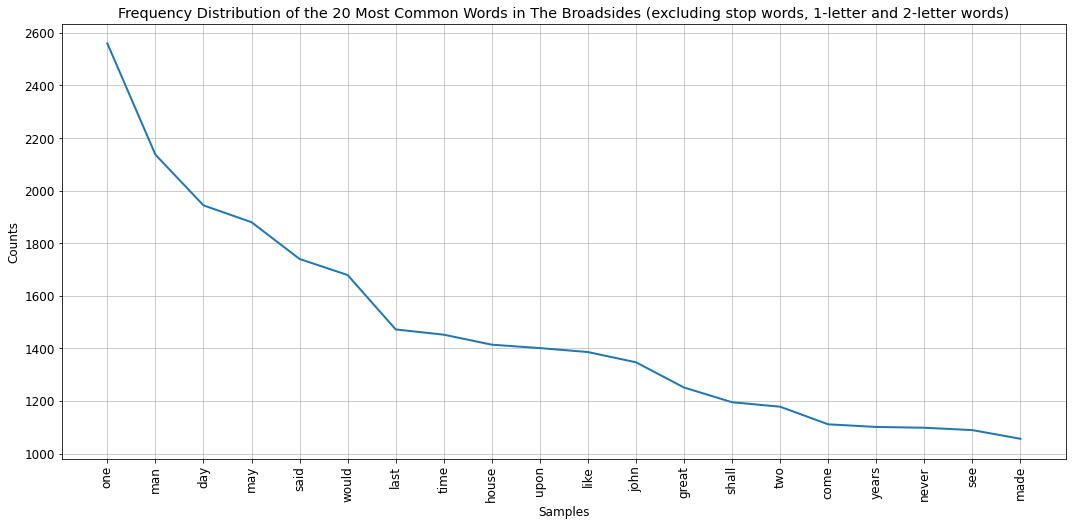

<AxesSubplot:title={'center':'Frequency Distribution of the 20 Most Common Words in The Broadsides (excluding stop words, 1-letter and 2-letter words)'}, xlabel='Samples', ylabel='Counts'>

In [50]:
# Visualise the frequency distribution for a select number of tokens 
plt.figure(figsize = (18, 8))                # customise the width and height of the plot
plt.rc('font', size=12)                       # customise the font size of the title, axes names, and axes labels
fdist.plot(20, title='Frequency Distribution of the 20 Most Common Words in The Broadsides (excluding stop words, 1-letter and 2-letter words)')

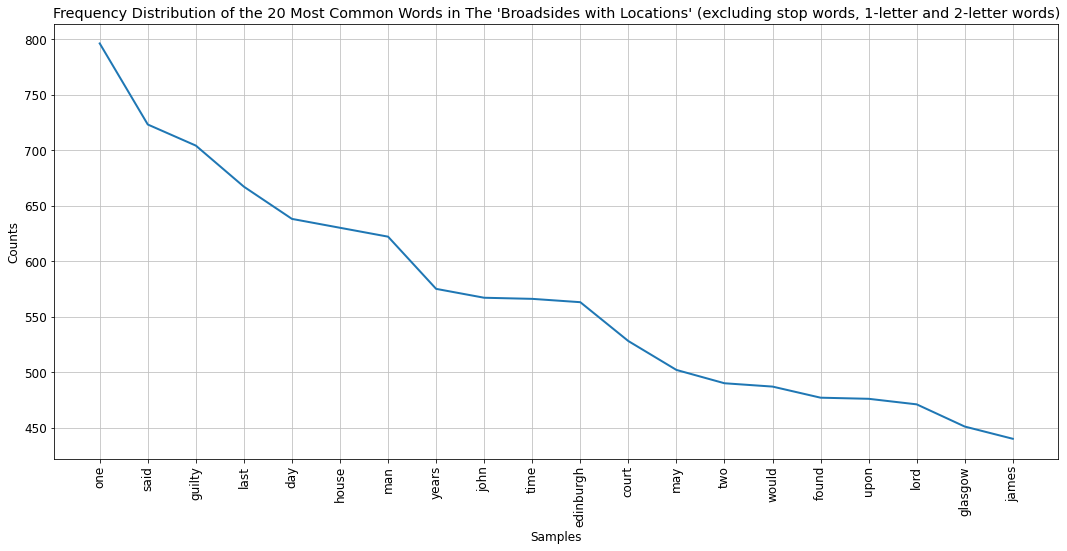

<AxesSubplot:title={'center':"Frequency Distribution of the 20 Most Common Words in The 'Broadsides with Locations' (excluding stop words, 1-letter and 2-letter words)"}, xlabel='Samples', ylabel='Counts'>

In [51]:
# Visualise the frequency distribution for a select number of tokens 
plt.figure(figsize = (18, 8))                # customise the width and height of the plot
plt.rc('font', size=12)                       # customise the font size of the title, axes names, and axes labels
locations_fdist.plot(20, title='Frequency Distribution of the 20 Most Common Words in The \'Broadsides with Locations\' (excluding stop words, 1-letter and 2-letter words)')

Unsurprisingly, we see that two of the most frequent words in the *Broadsides with Locations* are **Edinburgh** and **Glasgow**, which were not in the 20 most common words of the whole *Broadsides* collection.

#### 2.2 Uniqueness and Variety

To measure the diversity of the word choice within the text, we can use the **lexical diversity** metric, which is the length of the vocabulary of the text divided by the total length of the text.  *Length* is the total number of words, and *vocabulary* is the list of unique words in the text.

Let's compare the lexical diversity in the Broadsides dataset with the lexical diversity of the 'Broadsides with Locations':

**Step 1:** First we will remove all tokens that aren't words by excluding tokens that are made up of punctuation and digits, rather than letters.  As above, we will also `lowercase` all the words to *standardise* them, so that `The` and `the` are considered the same word, for example.

In [52]:
# Remove non-alphabetic tokens such as punctuation and digits and lowercase all tokens
alpha_lower = [t.lower() for t in str_tokens if t.isalpha()]
locations_alpha_lower = [t.lower() for t in locations_str_tokens if t.isalpha()]

# Print the lengths (total words) of The Broadsides and Broadsides with Locations
print("The Broadsides length:", len(alpha_lower), "words")
print("The \'Broadsides with Locations\'' length:", len(locations_alpha_lower), "words")

The Broadsides length: 984440 words
The 'Broadsides with Locations'' length: 310242 words


The length of the entire Broadsides is the same value we got earlier, this is going well! We can also see that the length of the 'Broadsides with Locations' is much lower that the entire collection, as expected.

**Step 2:** Now, let's compare the vocabulary.

In [53]:
vocab = set(alpha_lower)
locations_vocab = set(locations_alpha_lower)

print("The Broadsides vocabulary size:", len(vocab), "words")
print("The \'Broadsides with Locations\'' vocabulary size:", len(locations_vocab), "words")

The Broadsides vocabulary size: 40975 words
The 'Broadsides with Locations'' vocabulary size: 19969 words


So we can already see that the vocabulary size of the *Broadsides* is a lot smaller than the word size of the *Broadsides*. This is not surprising, as we saw earlier how many times some of the words are repeated. Interestingly, although the number of words in the *'Broadsides with Locations'* was around a **third** of the entire *Broadsides* collection, the vocabulary is closer to **half** the size. This indicates that there is more variety in the vocabulary used in the *'Broadsides with Locations'* respective to the entire *Broadsides*.

To confirm this, we will use the lexical diversity metric to look at the Broadsides vocabulary *relative* to its length and compare this to the 'Broadsides with Locations'.

**Step 3:** Calculate the lexical diversity.

In [54]:
# INPUT: a list of all words and a vocabulary list for a text source
# OUTPUT: the number of unique words (length of the vocabulary) divided by
#         the total words of a text source (the lexical diversity score)
def lexicalDiversity(all_words, vocab):
    return len(vocab)/len(all_words)

In [55]:
print("The Broadsides lexical diversity score:", lexicalDiversity(alpha_lower, vocab))
print("The The \'Broadsides with Locations\' lexical diversity score:", lexicalDiversity(locations_alpha_lower, locations_vocab))

The Broadsides lexical diversity score: 0.0416226484092479
The The 'Broadsides with Locations' lexical diversity score: 0.06436588211783059


This means our *Broadsides* texts have a lexical diversity of around **4%**, which is not very high! This indicates that the 1726 *Broadsides* texts that we are analysing all used fairly similar types of words throughout. Interestingly, the lexical diversity of the *'Broadsides with Locations'* was actually higher than the overall *Broadsides* collection, at around **6.5%**. This could potentially be due to the variation between where things were published leading to more variation in the words that were used.

Additionally, this is a good example of the impact of sample bias impacting statistics when you only look at a subset of the data.

### 3. Exploratory Analysis

#### 3.1 Who is named in the dataset?

In NLP, **named entity recognition** is the process of identifying people, places, and organisations ("entities") that are named in a dataset.  In order to recognise entities, a dataset of running text must be tokenised into sentences, and then those sentences must be tagged with parts of speech.  Entities' names are often capitalised, so we do not casefold text on which we want to run named entity recognition.

We've already tokenised sentences in the Broadsides dataset and tagged their parts of speech in [1.3 Part of Speech Tagging](#1.3-Part-of-Speech-Tagging), so we can use the resulting ``tagged_sents`` list.  We'll use SpaCy's named entity recognition tool:

First, we need to make sure we have the [SpaCy langauge model](https://spacy.io/models/en#en_core_web_sm) we are going to use. The original code included a method to import SpaCy, however, this assumed that SpaCy was already installed, which it was not in this notebook. Therefore, I sourced the code from [SpaCy download](https://https://spacy.io/api/cli#download) to first install the SpaCy library.

In [56]:
!pip install -U spacy

  Using cached spacy-3.4.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.5 MB)
  Using cached typer-0.7.0-py3-none-any.whl (38 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached cymem-2.0.7-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (35 kB)
  Using cached spacy_loggers-1.0.3-py3-none-any.whl (9.3 kB)
  Using cached murmurhash-1.0.9-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21 kB)
  Using cached srsly-2.4.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (490 kB)
  Using cached preshed-3.0.8-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (128 kB)
  Using cached pathy-0.6.2-py3-none-any.whl (42 kB)
  Using cached thinc-8.1.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (815 kB)
  Using cached spacy_legacy

In [57]:
try:
    import en_core_web_sm
except ImportError:
    print("Downloading en_core_web_sm model")
    import sys
    !{sys.executable} -m spacy download en_core_web_sm
else:
    print("Already have en_core_web_sm")

/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 13.2 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [58]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

/opt/conda/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [59]:
sentences = []
for fileid in fileids:
    file = wordlists.raw(fileid)
    sentences += nltk.sent_tokenize(file)

I will then check that the length of this new ``sentences`` list is the same as the ``all_sents`` above:

In [60]:
len(sentences)

35566

Good news - it is!

In [61]:
person_list = []
for s in sentences:
    s_ne = nlp(s)
    for entity in s_ne.ents:
        if entity.label_ == 'PERSON':
            person_list += [entity.text] 

In [62]:
print(len(person_list))

23950


This tells us that we have 23950 named 'people' entities in our Broadsides text files.

Lets have a look at one of the sentences, to see what types of entities it contains:

In [63]:
displacy.render(nlp(str(sentences[25085])), jupyter=True, style='ent')

This sentence example nicely demonstrates the benefits of Named Entity Recognition (NER). It allows us to identify dates and names of people within the text. It can also identify money, products (objects, vehicles, foods, etc), places (GPE - Geopolitical Entities), non-gpe locations (LOC), and ordinal information (first, second, etc).

In [64]:
displacy.render(nlp(str(sentences[24085])), jupyter=True, style='ent')

Now, this is interesting, there are lots of types of entities here. It has correctly identified Tonald Bayn as a person, and Inverary as a geographical location (GPE). But it has incorrectly identified the second mention of Tonald, by only his first name, as an organisation (ORG) and incorrectly identified the place Glengary as a person.

In [65]:
displacy.render(nlp(str(sentences[106])), jupyter=True, style='ent')

Running this piece of code on another sentence, it now correctly identifies Glengary as a location, but incorrectly identifies a range of other Scottish locations as people. This could not be the best package to use to look a locations in Scotland, due to the innaccuracies throughout.

In [66]:
unique_persons = list(set(person_list))
print(len(unique_persons))
names = []
for name in unique_persons:
    if re.search('([A-Z]{1}([a-z])+\.?)', name):
        names += [name]
print(len(names))

10402
9325


Next, we can use an API called [genderize.io](https://genderize.io/) to guess how many of the names refer to a male or female:

In [67]:
def guessGender(person_name):
    genderize_url = 'https://api.genderize.io?name='
    country_gb = '&country=GB'
    url = genderize_url+person_name+country_gb
    content = (urllib.request.urlopen(url)).read()
    return str(content).strip("b'")

In [68]:
gender_guesses = []
errored = []
titles = ['mrs', 'ms', 'mr', 'miss', 'sir', "ma'am", 'lord', 'lady', 'king', 'queen', 'duchess', 'duke', 'mademoiselle', 'madame', 'monsieur', 'signora']
for name in names:
    name = name.lower()
    for title in titles:
        if title in name:
            # Remove the title and any whitespace after the title
            name = name.replace(title, "").strip()
    
    # If the name includes a more than a given name (i.e. family name, middle
    # name), create a list of each name and take only the first list item
    name = name.split()
    if len(name) == 0:
        continue
    else:
        name = name[0]
    
    try:
        guess = guessGender(name)
        gender_guesses += [guess]
    except UnicodeEncodeError:
        errored += [name]
    # If there are too many requests (for genderize.io, 
    # only 1000 can be made in a day), end the loop
    except HTTPError:
        print('HTTP Error')   
    
print(gender_guesses[:3])

NameError: name 'HTTPError' is not defined

In [69]:
print("Number of gender guesses made:", len(gender_guesses))

Number of gender guesses made: 1000


Since there's a limit on the number of requests that one can make to genderize.io in single day, so for now let's simply use the 1000 guesses we just made. (This number will differ depending on how many gender guesses it allowed you to make).

Let's calculate the number of names guessed to be for a "male" and "female" with a probability of at least a 0.9 (90%).  To make it easier to find guesses that meet this criteria, we'll convert the gender guesses to a different data structure.  Genderize.io sends responses (returns gender guesses) in the JSON data format, which is similar to Python's dictionary data structure, so we'll convert the String representations of the JSON responses into dictionaries.  Then we'll figure out whether a name is guessed as representing a "male" or "female" gender-identifying person with at least 90% probability.

<div class="alert alert-block alert-warning">
    <b>Note:</b> This process is limited because it considers gender a binary rather than a spectrum!  Gender guesses from the genderize.io API should thus be taken with a grain of salt: the guesses provide an indication of two categories of people discussed in the Broadsides dataset and should not be interpreted as 100% accurate.
</div>

In [70]:
import json
male_guesses = []
female_guesses = []
for response in gender_guesses:
    response = response.replace("\\","")
    response = response.replace("\'s","")
    try:
        response = json.loads(response)

        if response["probability"] >= 0.9:
            if response["gender"] == "male":
                male_guesses += [response["name"]]
            elif response["gender"] == "female":
                female_guesses += [response["name"]]

    # If there's an error, print the response
    # to see if the name is valid
    except:
        print(response)

print("Names guessed male:", len(male_guesses))
print("Names guessed female:", len(female_guesses))

Names guessed male: 467
Names guessed female: 132


No names threw up an error - good news.  Let's take a closer look at the names guessed as female:

In [71]:
print(female_guesses)

['margaret', 'bessie', 'elizabeth', 'nancy', 'janet', 'awa', 'margaret', 'mary', 'eileen', 'elizabeth', 'sally', 'auld', 'bohea', 'assize', 'sally', 'mary', 'mary', 'marion', 'ann', 'marjory', 'admire', 'bonnie', 'nancy', 'blyth', 'margaret', 'gifts', 'agnes', 'maria', 'bessy', 'elizabeth', 'mary', 'jemima', 'mary', 'jeannie', 'betty', 'grace', 'leticia', 'margaret', 'margaret', 'dodgson', 'mary', 'sally', 'dorry', 'geneva', 'cherry', 'sacred', 'catherine', 'sally', 'margaret', 'auld', 'joan', 'maggie', 'paisley', 'nelly', 'ann', 'sacred', 'emma', 'nannie', 'helen', 'molly', 'margaret', 'sally', 'auld', 'margaret', 'jannet', 'auld', 'thy', 'margaret', 'auld', 'alane', 'r.', 'margaret', 'elizabeth', 'brownlie', 'susan', 'magdalene', 'ostler', 'auld', 'r.', 'kitty', 'fancy', 'madam', 'janet', 'kate', 'helen', "m'kenna", 'betty', 'mary', 'female', 'ryme', 'mary', 'susannah', 'auld', 'jamica', 'paisley', 'ginger', 'rebecca', 'norah', 'bonnie', 'erin', 'iona', 'concise', 'jenny', 'janet', '

In [72]:
t.concordance('Elizabeth')

Displaying 25 of 66 matches:
for the Proprietor by T . Duncan . Elizabeth M ' Neil afraid of the Hangman ' s
mes , sloop , Greenock , Smithâ  Elizabeth , smack , Camp - belton , sunk and
 ; but we believe that the othrs , Elizabeth and Margaret Henderson , Cate - ri
 of evidence . Janet Alexander and Elizabeth Livingston , for breaking into a c
and is to be transported 7 years . Elizabeth Guthrie alias Betty Burnett , thef
 remitted back to Paisley prison . Elizabeth Paul , alias Wilson was thereafter
t to Glasgaw prison . And lastly , Elizabeth Paul , alias Wilson being called t
guilty ; 14 years transportation . Elizabeth M ' Lain , for theft , pled guilty
guilty ; 14 years transportation . Elizabeth Connelly or M ' Credie , for steal
lty , to be transported for life . Elizabeth Livingston , theft in Greenock , p
h Wilson , a female of seduction . ELIZABETH WILSON , a respectable farmer ' s 
t . Seven years ' transportation . Elizabeth Hanigan , theft . Seven years ' tr
 Robert Osb

#### 3.2 Visualising words over time

Using [Altair](https://altair-viz.github.io/index.html), we can visualise the occurrence of a single word in the Broadsides dataset.  Let's visualise the most commonly occuring name from among those guessed to be referring to a female (in the `female_guesses` list created above)!

**Step 1**: First we need to determine which name in the `female_guesses` list occurs most frequently in the Broadsides dataset:

In [73]:
fdist = nltk.FreqDist(n for n in str_tokens_lower if n.lower() in female_guesses)
fdist.most_common(10)

[('thy', 735),
 ('mary', 469),
 ('auld', 447),
 ('bonnie', 419),
 ('awa', 383),
 ('margaret', 313),
 ('paisley', 197),
 ('grace', 177),
 ('female', 159),
 ('ann', 148)]

Here we can see that a number of the words that it has recognised as 'names', are in fact part of the English or Scottish language, so it's not perfect!

In [74]:
str_tokens_lower.count('mary')

469

Okay so Mary is the most commonly identified, female, given name!  Now let's count how many times Mary occurrs in every publication (file) in the Broadsides dataset and create a DataFrame (table) with those counts:

In [75]:
def nameCountPerFile(name, plaintext_corpus_read_lists):
    name_count = []
    for file in fileids:
        file_tokens = plaintext_corpus_read_lists.words(file)
        lower_tokens = [t.lower() for t in file_tokens]
        name_count += [lower_tokens.count(name)]
    return name_count

In [76]:
mary_count = nameCountPerFile('mary', wordlists)
df_mary = df
df_mary['mary_count'] = mary_count
df_mary

,fileid,title,mary_count
0,74459405.txt,Praise of the weavers - Ry.III.a.10(78),0
1,74459849.txt,"Slippy Stane', 'The Scotch Brigade', 'Somewher...",0
2,74572646.txt,Proper new ballad in praise of the gallant wea...,0
3,74458970.txt,Rise up noble Britons - RB.m.169(109),0
4,74459015.txt,"Rare new song, shewing the bravery of His Grac...",0
...,...,...,...
1721,74460659.txt,"Verses on the melancholy death of John White, ...",0
1722,74460673.txt,"Letter from a gentleman in Forfar, to his frie...",0
1723,74460841.txt,Account of the trial and sentence of D. McInne...,0
1724,74460862.txt,True and full account of the sad and deplorabl...,0


The resulting dataframe shows us every single file, but we are not interested in the files that don't contain the word 'mary'. Therefore, lets select for only those that do contain the word mary, to see how many there are.

We will then sort the dataframe based on the values in the 'mary_count' column, to see which text file uses 'mary' the most times:

In [77]:
df_mary_count = df_mary.loc[df_mary['mary_count'] > 0]

df_mary_count.sort_values('mary_count')

,fileid,title,mary_count
1013,74460681.txt,Letter from a friend on a journey to the north...,1
1202,74460365.txt,Mansie Waugh's dream concerning the execution ...,1
1199,74460253.txt,Executions In Paisley - APS.3.98.9,1
1197,74460250.txt,Full and particular account of the execution o...,1
1182,74460220.txt,Full and particular account of the execution o...,1
...,...,...,...
874,74459596.txt,Irish emigrant - L.C.Fol.70(003),13
1114,74459817.txt,My nannie's awa - APS.3.80.4,13
906,74460622.txt,Full and particular account of the trial and s...,14
858,74459328.txt,Mary Neil - L.C.Fol.178A.2(063),14


Great, now we can see that 169 of the text files contained the word 'mary' at least once and that the highest number of times it occurred within one text file was 15!

In [78]:
source = df_mary

alt.Chart(source, title="Occurrence of the name 'Mary' in the Broadsides dataset").mark_bar(size=30).encode(
    alt.X('title:N', axis=alt.Axis(title='Volume', labels=False), sort=None),  # The source dataframe, df_mary, is in chronological order, so we don't want a different sorting
    alt.Y('mary_count:Q', axis=alt.Axis(title='Count'), sort=None)
).configure_axis(
    grid=False,
    labelFontSize=12,
    titleFontSize=12,
    labelAngle=-45
).properties(
    width=550
).mark_bar(size=3)

alt.Chart(...)

This plot shows the variation between the occurrence of 'mary' in different Broadsides, but doesn't give much more insight than that.

Lets repeat this for the make guesses, to see the difference:

In [79]:
print(male_guesses)

['richal', 'peter', 'pillars', 'dr', 'hugh', 'birth', 'james', 'robinson', 'concider', 'john', 'barbarous', 'harry', 'patient', 'james', 'alexander', 'john', 'advise', 'james', 'h.', 'wigs', 'dakers', 'james', 'thomas', 'daft', 'green', 'sam', 'alexander', 'john', 'william', 'hamilton', 'william', 'parks', 'kirk', 'dr', 'boyd', 'william', 'nobleman', 'george', 'john', 'william', 'crispin', 'herschel', 'dan', 'said', 'john', 'macdonald', 'joseph', 'guns', 'lauchlan', 'robert', 'david', 'john', 'anson', 'robins', 'archibald', 'john', 'kinrade', 'george', 'charles', 'cashel', 'james', 'gregg', 'wooers', 'fald', 'graham', 'hacket', 'james', 'dick', 'common', 'michael', 'pde', 'william', 'humer', 'fairs', 'd.', 'boby', 'watt', 'edward', 'john', 'william', 'beaconsfield', 'william', 'd.', 'david', 'david', 'w.', 'william', 'george', 'prince', 'william', 'steed', 'raymond', 'm.', 'john', 'hume', 'willie', 'henry', 'dundas', 'john', 'charles', 'johnston', 'kenneth', 'dempsey', 'green', 'noble'

In [80]:
t.concordance('edward')

Displaying 25 of 30 matches:
he Queen then she smi ing rep ied . Edward it was my father ' s name . I was b
not Experience teach thee well ; in Edward Lang - shank ' s Reign , How they p
 of battle lour ! See approach poor Edward ' s pow ' r ! Chains , and slaverie
the Execution of ANDREW STEWART and EDWARD KELLY , who suffered in Glasgow on 
rticles ; also Â £ 211s . in cash . Edward Kelly , for roboing James Fleming ,
 Execution of ANDREW STEW - ART and EDWARD KELLY , who were both Executed at G
ut in force upon ANDREW STEWART and EDWARD KELLY , convicted at our last Circu
e in Paisley . Transported 14 years Edward Hand , from Greenock , for attempt 
ness was married in October last to Edward Fitzgerald , a private in the 88th 
ing than take any thing from them . Edward Fitzgerald , Private in the 88th re
 in the other : and round the rim " Edward Dei Gra Rex ." is entire . The reve
 . and purparting to to be drawn by Edward Williams . The trial came on last ,
to be hers , were Forgo

In [81]:
fdist = nltk.FreqDist(n for n in str_tokens_lower if n.lower() in male_guesses)
fdist.most_common(10)

[('said', 1740),
 ('john', 1347),
 ('james', 857),
 ('court', 759),
 ('william', 547),
 ('green', 392),
 ('robert', 293),
 ('thomas', 284),
 ('white', 272),
 ('clerk', 265)]

Again, we can see a few inaccuracies here. Words such as long, brought, green, whose, and brave, which we know to be common words of the English language, are appearing incorrectly as 'people'. Additionally, these 'most common names' change each time you run the code, depending on how many gender guesses the function completes, therefore some of those below the top name might change each time. Nonetheless, 'John' is quite clearly the most common.

In [82]:
str_tokens_lower.count('john')

1347

We have already created the NameCountPerFile function above, and therefore can use this function again to create a dataframe for 'john':

In [83]:
john_count = nameCountPerFile('john', wordlists)
df_john = df
df_john['john_count'] = john_count
df_john

,fileid,title,mary_count,john_count
0,74459405.txt,Praise of the weavers - Ry.III.a.10(78),0,1
1,74459849.txt,"Slippy Stane', 'The Scotch Brigade', 'Somewher...",0,0
2,74572646.txt,Proper new ballad in praise of the gallant wea...,0,0
3,74458970.txt,Rise up noble Britons - RB.m.169(109),0,0
4,74459015.txt,"Rare new song, shewing the bravery of His Grac...",0,1
...,...,...,...,...
1721,74460659.txt,"Verses on the melancholy death of John White, ...",0,1
1722,74460673.txt,"Letter from a gentleman in Forfar, to his frie...",0,0
1723,74460841.txt,Account of the trial and sentence of D. McInne...,0,2
1724,74460862.txt,True and full account of the sad and deplorabl...,0,0


Again, we want to see specifically the files which **do** contain the word 'john':

In [84]:
df_john_count = df_john.loc[df_john['john_count'] > 0]

df_john_count.sort_values('john_count')

,fileid,title,mary_count,john_count
0,74459405.txt,Praise of the weavers - Ry.III.a.10(78),0,1
512,74459643.txt,"Old world; or, It is far from the world that I...",0,1
514,74459706.txt,True Scots mens lament for the loss of the rig...,0,1
515,74459719.txt,Whigs and Radicals - ABS.10.203.01(100),0,1
527,74460027.txt,Address to the Electors of Edinburgh - ABS.10....,0,1
...,...,...,...,...
1147,74459718.txt,Week after the fair - L.C.Fol.70(261),0,14
32,74460409.txt,Plain Answers to Plain Questions - L.C.Fol.74(...,0,16
1417,74460641.txt,"Glasgow, April 23, 1823 - L.C.Fol.73(53)",0,17
1342,74460680.txt,Auld Reekie's lament for John Kennedy - L.C.12...,0,18


Here, we can see that 486 of the files mentioned 'john', but that the highest number was 44, a lot higher than for 'mary'!

### 4. Exploring the Location Data

#### 4.1 Locations in Broadside Titles

Do you remember that dataframe we created at the beginning, which contained all the Broadsides with a Scottish location named in the title? It was called `title_locations_df`. Let's give ourselves a reminder:

In [85]:
title_locations_df

,fileid,title,location,location_str
0,74459905.txt,Ayr Autumn Circuit - L.C.Fol.73(123),[Ayr],Ayr
1,74459907.txt,"Circuit Court : Glasgow, 15th Sept. 1828 - L.C...",[Glasgow],Glasgow
2,74459909.txt,Trials & sentences of all the different prison...,[Glasgow],Glasgow
3,74459912.txt,Account of the trials and sentences of all the...,[Glasgow],Glasgow
4,74459913.txt,Particular account of the procedure of the Cir...,[Glasgow],Glasgow
...,...,...,...,...
448,74460372.txt,Full and particular account of the loss of the...,[Leith],Leith
449,74460385.txt,Account of the shocking case of Mrs Anderson S...,[Leith],Leith
450,74460386.txt,"Full, true and particular account of that most...","[Dunbar, Edinburgh]","Dunbar,Edinburgh"
451,74460392.txt,Full true and particular account of the murder...,"[Edinburgh, Musselburgh]","Edinburgh,Musselburgh"


Now we want to explore this data a little further, we can use `value_counts()` to see how many of each of our locations are mentioned and then plot this as a bar chart:

In [86]:
title_locations_df['location_str'].value_counts()

Edinburgh                140
Glasgow                   80
Highland                  13
Leith                     12
Stirling                  12
                        ... 
North Berwick              1
Moffat                     1
Cupar,Dundee               1
Cambuslang                 1
Edinburgh,Musselburgh      1
Name: location_str, Length: 104, dtype: int64

<AxesSubplot:>

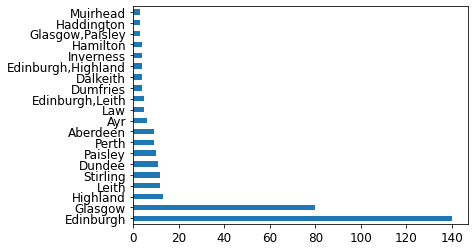

In [87]:
title_locations_df['location_str'].value_counts()[:20].plot(kind='barh')

It's not surpising that Edinburgh and Glasgow are the most mentioned. This gives us some idea of the Broadsides in which the location was so important as to be part of the title, but doesn't tell us much about the locations that were discussed *within* the *text* of the Broadsides.

#### 4.2 Locations in the Broadsides text

We can go back to our original list of Scottish places and iterate through the words of the text files to identify them. This is slightly more complex than with the titles, but we can use the `str_tokens` list we created earlier.

**Step 1:** Iterate through the list of tokens, and if they match an item in the `locations_txt` list, then add them to a new list, `text_locations`:

In [88]:
# Create an empty list for the locations
text_locations = []
# Each time a location name is found within the text it is added to the list
text_locations = [w for w in str_tokens if w in locations_txt]

print('Total number of times a place name is mentioned in the Broadsides: ', len(text_locations))
text_locations
        

Total number of times a place name is mentioned in the Broadsides:  4171


['Glasgow',
 'Edinburgh',
 'Douglas',
 'Queensferry',
 'Glasgow',
 'Glasgow',
 'Paisley',
 'Paisley',
 'Glasgow',
 'Edinburgh',
 'Edinburgh',
 'Glasgow',
 'Glasgow',
 'Keith',
 'Hamilton',
 'Renfrew',
 'Edinburgh',
 'Douglas',
 'Glasgow',
 'Edinburgh',
 'Leith',
 'Law',
 'Edinburgh',
 'Haddington',
 'Lauder',
 'Leith',
 'Edinburgh',
 'Edinburgh',
 'Aberdeen',
 'Balloch',
 'Renfrew',
 'Carron',
 'Douglas',
 'Glasgow',
 'Glasgow',
 'Montrose',
 'Montrose',
 'Edinburgh',
 'Glasgow',
 'Highland',
 'Forth',
 'Aberdeen',
 'Edinburgh',
 'Paisley',
 'Edinburgh',
 'Law',
 'Law',
 'Law',
 'Law',
 'Law',
 'Highland',
 'Highland',
 'Buckie',
 'Edinburgh',
 'Law',
 'Glasgow',
 'Glasgow',
 'Glasgow',
 'Glasgow',
 'Glasgow',
 'Glasgow',
 'Dalkeith',
 'Airdrie',
 'Dalkeith',
 'Airdrie',
 'Dalkeith',
 'Airdrie',
 'Glasgow',
 'Glasgow',
 'Glasgow',
 'Edinburgh',
 'Leith',
 'Innerleithen',
 'Leith',
 'Edinburgh',
 'Edinburgh',
 'Lochwinnoch',
 'Lochwinnoch',
 'Glasgow',
 'Glasgow',
 'Glasgow',
 'Winchbur

Wow! So our Scottish locations were mentioned a total of **4171** times throughout the entire Broadsides. 

**Step 2:** We will turn this into a dataframe, so that it's easier to work with:

In [89]:
text_locations_df = pd.DataFrame(text_locations)
text_locations_df.rename(columns={0: 'location'}, inplace=True)
text_locations_df

,location
0,Glasgow
1,Edinburgh
2,Douglas
3,Queensferry
4,Glasgow
...,...
4166,Muirhead
4167,Edinburgh
4168,Edinburgh
4169,Edinburgh


So currently, this is just a long list of locations, listed in the order that they appear throughout the Broadsides. 

**Step 3:** We can use `value_counts` again to find out how many occurrences there are of each location and plot another `value_counts` graph to visualise this:

In [90]:
text_locations_df.value_counts()

location    
Edinburgh       900
Glasgow         857
Dundee          191
Paisley         188
Leith           164
               ... 
Innerleithen      1
Inchinnan         1
Helensburgh       1
Hawick            1
Banchory          1
Length: 191, dtype: int64

<AxesSubplot:>

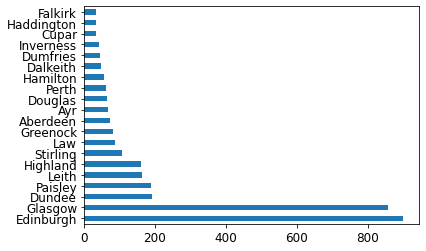

In [91]:
text_locations_df['location'].value_counts()[:20].plot(kind='barh')

Now we've got a graph similar to the one we had for the locations in the titles. 

#### 4.3 Comparison between locations in the titles and the text

Next, we can look at how much each location was mentioned as a percentage of the total, and see how these compare between the **titles** and the **texts** of the Broadsides. As the total number of times a location was mentioned is a lot higher in the text that in the titles, we need to instead look at each location as a percentage of the total, to allow us to make comparisons.

**Step 1:** We will first create a dataframe each for the titles and texts containing the normalised `value_counts` for each location:

In [92]:
# Create a dataframe containing the normalised value_counts of each location and convert these to percentages
title_location_counts_df = title_locations_df['location_str'].value_counts(normalize=True).rename_axis('location').reset_index(name='normalised_counts')
title_location_counts_df['title_percentage'] = title_location_counts_df['normalised_counts'].mul(100).round(1).astype(int)

text_location_counts_df = text_locations_df['location'].value_counts(normalize=True).rename_axis('location').reset_index(name='normalised_counts')
text_location_counts_df['text_percentage'] = text_location_counts_df['normalised_counts'].mul(100).round(1).astype(int)

print(title_location_counts_df)
print(text_location_counts_df)

                  location  normalised_counts  title_percentage
0                Edinburgh           0.309051                30
1                  Glasgow           0.176600                17
2                 Highland           0.028698                 2
3                    Leith           0.026490                 2
4                 Stirling           0.026490                 2
..                     ...                ...               ...
99           North Berwick           0.002208                 0
100                 Moffat           0.002208                 0
101           Cupar,Dundee           0.002208                 0
102             Cambuslang           0.002208                 0
103  Edinburgh,Musselburgh           0.002208                 0

[104 rows x 3 columns]
         location  normalised_counts  text_percentage
0       Edinburgh           0.215776               21
1         Glasgow           0.205466               20
2          Dundee           0.045792          

**Step 2:** Next, we will merge these dataframes together, so that we can present the data on the same graph:

In [93]:
locations_percentages_df = pd.merge(left=title_location_counts_df, right=text_location_counts_df, on='location')
locations_percentages_df

,location,normalised_counts_x,title_percentage,normalised_counts_y,text_percentage
0,Edinburgh,0.309051,30,0.215776,21
1,Glasgow,0.176600,17,0.205466,20
2,Highland,0.028698,2,0.038120,3
3,Leith,0.026490,2,0.039319,3
4,Stirling,0.026490,2,0.025414,2
5,Dundee,0.024283,2,0.045792,4
6,Paisley,0.022075,2,0.045073,4
7,Perth,0.019868,2,0.014625,1
8,Aberdeen,0.019868,2,0.017502,1
9,Ayr,0.013245,1,0.016063,1


**Step 3:** Finally, we will create a bar plot showing the percentages each location was mentioned in both the **titles** and the **texts**, so we can compare between the two:

<AxesSubplot:title={'center':'Number of times location was mentioned in Broadsides as a percentage of total mentions'}, xlabel='Location', ylabel='Percentage'>

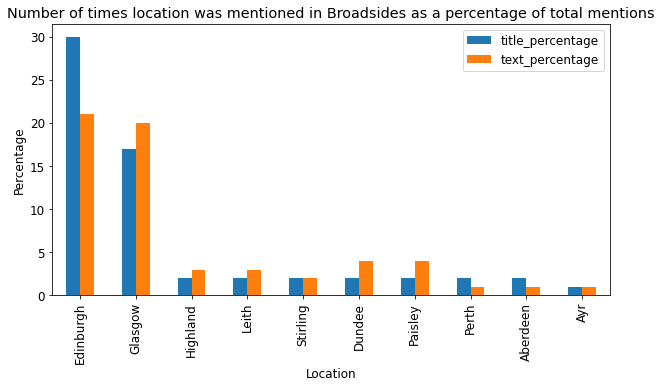

In [94]:
locations_percentages_df.iloc[:10].plot.bar(x='location', y=['title_percentage', 'text_percentage'], ylabel='Percentage', xlabel='Location', legend=True, 
                           title='Number of times location was mentioned in Broadsides as a percentage of total mentions',
                                  figsize=(10,5))


This gives us some really interesting comparisons. 

We can see that as a percentage, Edinburgh was mentioned more in the titles of the Broadsides than in the text, whereas the opposite was true for Glasgow. We can also see that the smaller towns, such as Highland, Leith, Dundee, and Paisley were mentioned more in the text rather than the titles. This is unsurprising, as there were probably lots of news updates that mentioned location where things had happened in the text, but most of the time these stories wouldn't be gorundbreaking enough to deserve a headline. 

Furthermore, after the two major cities, we can also see that there is very minimal variation in title mentions between the other locations. Again, most of the major events, such as trials, executions, politics and a lot of the gossip would have been occurring in the most populated places. Meaning there were probably only rare occasions that these smaller town made the headlines.

#### 4.4 Edinburgh locations in the Broadsides

Finally, we can then repeat this process to look specifically and areas within Edinburgh that might be mentioned in the Broadsides. The text file 'edinburgh_places' contains a list of locations. We will repeat the process as before:

In [95]:
edi_locations_file = open('edinburgh_places.txt', 'r')
edi_locations_txt = edi_locations_file.read().split('\n')
edi_locations_txt

['Blackford',
 'Braid Hills',
 'Calton Hill',
 'Craigentinny',
 'Craiglockhart',
 'Duddingston',
 'Gorgie',
 'Granton',
 'Grassmarket',
 'Haymarket',
 'Holyrood',
 'Inverleith',
 'Liberton',
 'Morningside',
 'New Town',
 'Newington',
 'Old Town',
 'Portobello',
 'Stockbridge',
 '']

In [96]:
edi_locations_txt.pop()

''

In [97]:
edi_text_locations = []
edi_text_locations = [w for w in str_tokens if w in edi_locations_txt]

print('Total number of times a place name is mentioned in the Broadsides: ', len(edi_text_locations))
edi_text_locations

Total number of times a place name is mentioned in the Broadsides:  57


['Granton',
 'Granton',
 'Granton',
 'Portobello',
 'Holyrood',
 'Granton',
 'Granton',
 'Granton',
 'Grassmarket',
 'Portobello',
 'Craiglockhart',
 'Stockbridge',
 'Stockbridge',
 'Grassmarket',
 'Granton',
 'Granton',
 'Holyrood',
 'Holyrood',
 'Grassmarket',
 'Newington',
 'Grassmarket',
 'Newington',
 'Newington',
 'Portobello',
 'Inverleith',
 'Newington',
 'Grassmarket',
 'Portobello',
 'Newington',
 'Holyrood',
 'Granton',
 'Granton',
 'Holyrood',
 'Grassmarket',
 'Portobello',
 'Portobello',
 'Portobello',
 'Grassmarket',
 'Grassmarket',
 'Newington',
 'Newington',
 'Grassmarket',
 'Newington',
 'Newington',
 'Grassmarket',
 'Grassmarket',
 'Grassmarket',
 'Portobello',
 'Portobello',
 'Liberton',
 'Newington',
 'Grassmarket',
 'Holyrood',
 'Grassmarket',
 'Grassmarket',
 'Stockbridge',
 'Stockbridge']

In [98]:
edi_text_locations_df = pd.DataFrame(edi_text_locations)
edi_text_locations_df.rename(columns={0: 'location'}, inplace=True)
edi_text_locations_df

,location
0,Granton
1,Granton
2,Granton
3,Portobello
4,Holyrood
5,Granton
6,Granton
7,Granton
8,Grassmarket
9,Portobello


In [99]:
edi_text_locations_df.value_counts()

location     
Grassmarket      15
Granton          10
Newington        10
Portobello        9
Holyrood          6
Stockbridge       4
Craiglockhart     1
Inverleith        1
Liberton          1
dtype: int64

<AxesSubplot:>

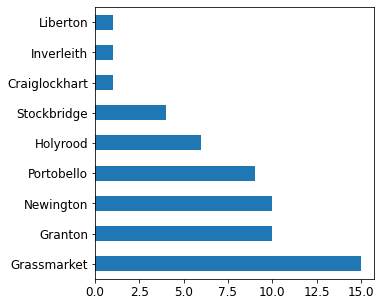

In [100]:
edi_text_locations_df['location'].value_counts().plot(kind='barh', figsize=(5,5))

This tells us that many areas of Edinburgh that we know of today had the same names when the Broadsides were written! We can also see that Grassmarket was the most mentioned location within Edinburgh. This is probably because it was where they held the executions at the time.

### 5. Exploring the Metadata

At the beginning of this notebook, we previously uploaded and cleaned the Broadsides metadata, which will allow us to now get an overview of some other information on the data.

Let's start by looking at the names of the columns within our metadata dataframe:

In [101]:
list(metadata_df.columns)

['id',
 'title',
 'language_term',
 'form',
 'place',
 'place_code',
 'date_issued',
 'publisher',
 'issuance',
 'form.1',
 'size',
 'genre1',
 'genre2',
 'topic1',
 'topic2',
 'topic3',
 'topic4',
 'topic5',
 'topic6',
 'topic7',
 'topic8',
 'person1',
 'person1_title',
 'person2',
 'person2_title',
 'person3',
 'person3_title',
 'person4',
 'person4_title',
 'fileid']

Wow! That's a lot of columns. This tells us that there is a lot of information on each Broadside, but we also know that this information is not complete. Some of the Broadsides were accompanied by a lot of metadata, and some have very minimal metadata. We need to keep this in mind when doing our analysis.

#### 5.1 Publication languages of the Broadsides
Let's start by looking at the languages used in the Broadsides:

<AxesSubplot:>

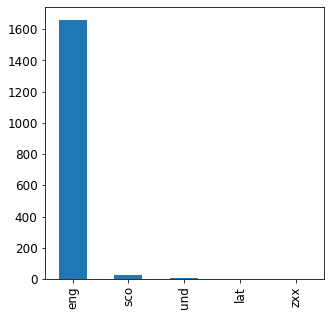

In [102]:
metadata_df['language_term'].value_counts().plot(kind='bar', figsize=(5,5))

Unsurprisingly, the majority of the Broadsides were written in English, with a few in Scots, and a very minimal number in Latin, or another undetermined language.

#### 5.2 Publication places of the Broadsides
Let's look at the places they were published instead, maybe they will be a little more exciting:

<AxesSubplot:>

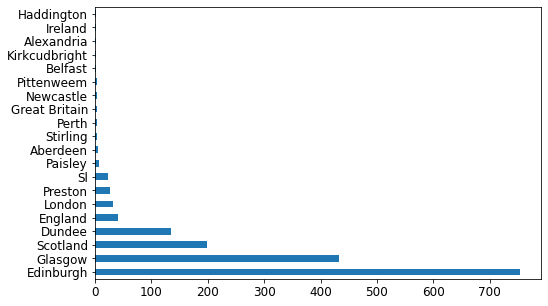

In [103]:
metadata_df['place'].value_counts()[:20].plot(kind='barh', figsize=(8,5))

This gives us a little more information. As expected, the most common publishing locations were in cities and towns in Scotland, though it does show us that a number came from further afield, such as England and Ireland. This graph also shows us some discrepancies in the data as we have cities and towns, such as Edinburgh and London, being listed alongside countries, such as Scotland and England. This shows that different information has been collected for different Broadsides.

#### 5.3 Genres and topics of the Broadsides
Next, we will look at the variation in the genres and topics:

<AxesSubplot:>

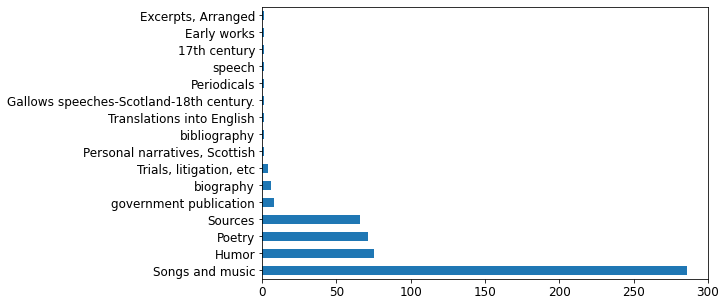

In [104]:
metadata_df['genre1'].value_counts().plot(kind='barh', figsize=(8,5))

<AxesSubplot:>

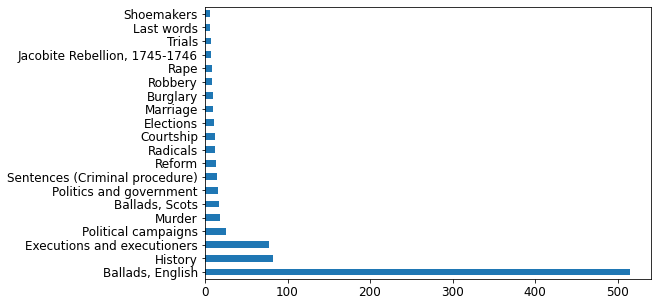

In [105]:
metadata_df['topic1'].value_counts()[:20].plot(kind='barh', figsize=(8,5))

Both of these graphs tell us how important publishing songs and music was at the time.

#### 5.4 Dates of Broadsides publication

Finally, lets take a look at the years that the Broadsides were published. Here, we could try using `.value_counts()` as we did before:

In [106]:
metadata_df['date_issued'].value_counts()

1880    186
1830     76
1860     76
1840     61
1823     57
       ... 
1682      1
1931      1
1806      1
1729      1
1839      1
Name: date_issued, Length: 162, dtype: Int64

<AxesSubplot:>

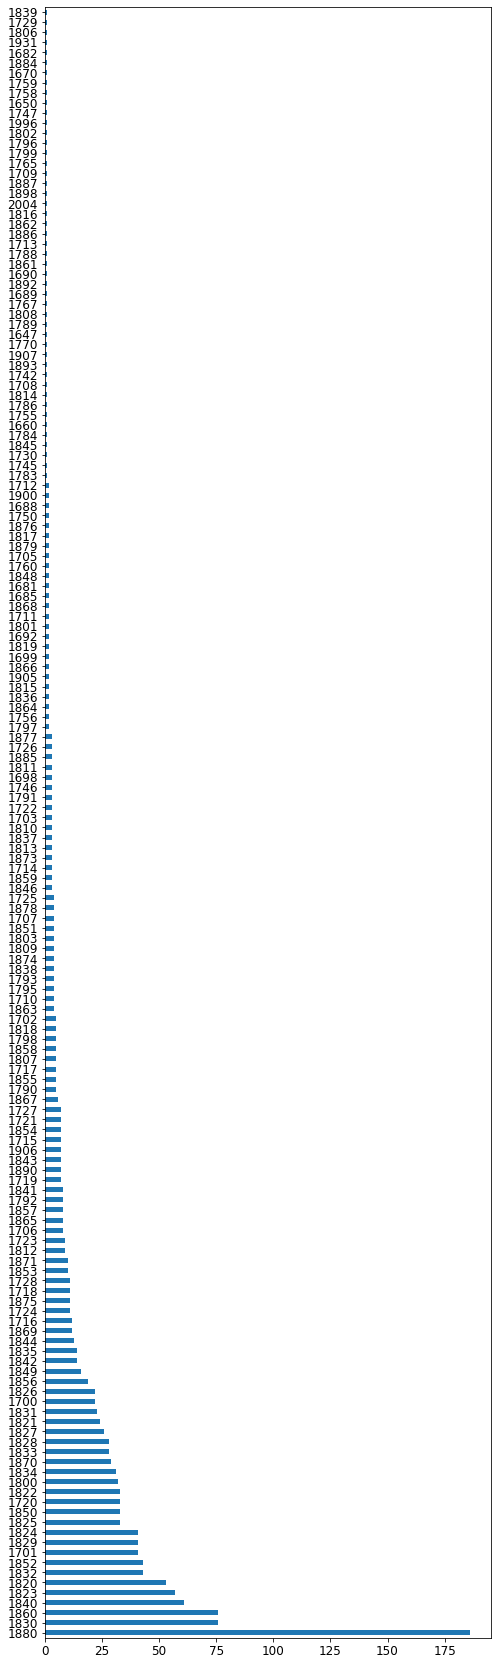

In [107]:
metadata_df['date_issued'].value_counts().plot(kind='barh', figsize=(8,30))

This is useful to tell us the year with the most Broadsides published - we can clearly see that in the dataset there were the most publications in the year 1880. However, as the years aren't in chronological order it doesn't tell us much else.

There are a number of ways to deal with this. The first option is to create a `countplot` using the **seaborn** library. This will count up the number of times each unique value occurs and add it to a histogram. However, count plot requires the value type to be a *string* not and *int*. Therefore, we have to convert the data type of the **date_issued** back to strings.

However, because the numbers are no longer numerical integers, the plot cannot put them into ascending or descending order by value. Therefore, we must first *sort* the values into ascending order whilst they are still *ints* and then convert them to *strings* to be counted by the `countplot`:

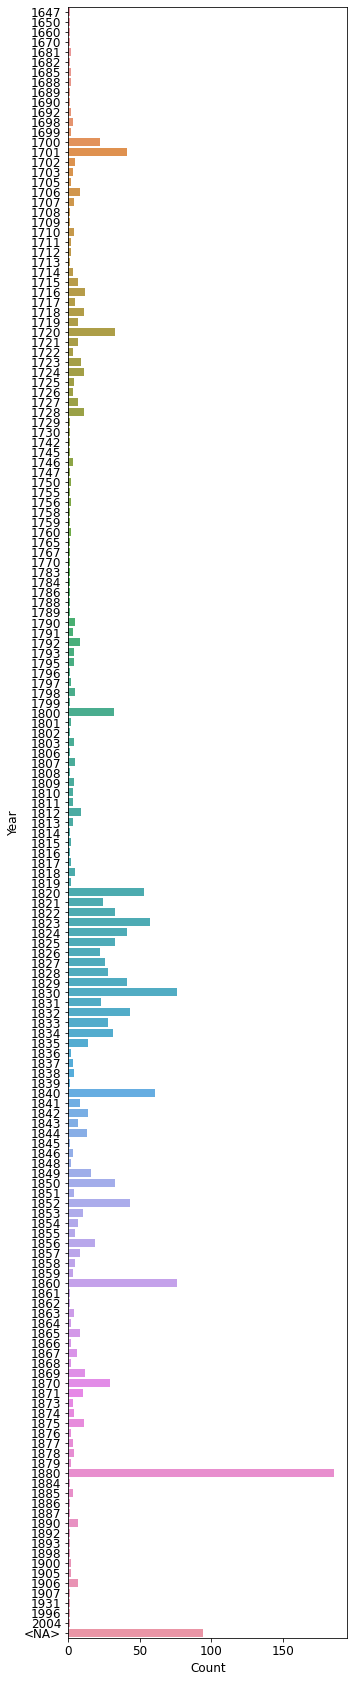

In [108]:
import seaborn as sns

# Create new dataframe with date_issued sorted by year
metadata_sorted_year = metadata_df.sort_values(by=['date_issued'])
# Add new column to the dataframe with years converted into strings
metadata_sorted_year['date_issued_str'] = metadata_sorted_year['date_issued'].astype(str)


plt.figure(figsize=(5,30))
sns.countplot(y='date_issued_str', data=metadata_sorted_year)
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()

The benefits of the `countplot` is that it again gives us very specific data about each year. It also tells us that quite a lot of the Broadsides don't have a **date_issued** value. On the other hand, this is not the easiest graph to look at. The graph has to be tall to be able to see all the individual years, but its height means we cannot see the whole graph at once, making it hard to draw comparisons between different years. The individual bars also make it harder to see trends throughout the years.

So now we've managed to views the counts of publications by year, in chronological order.

The second option is to use a **seaborn** `displot`:

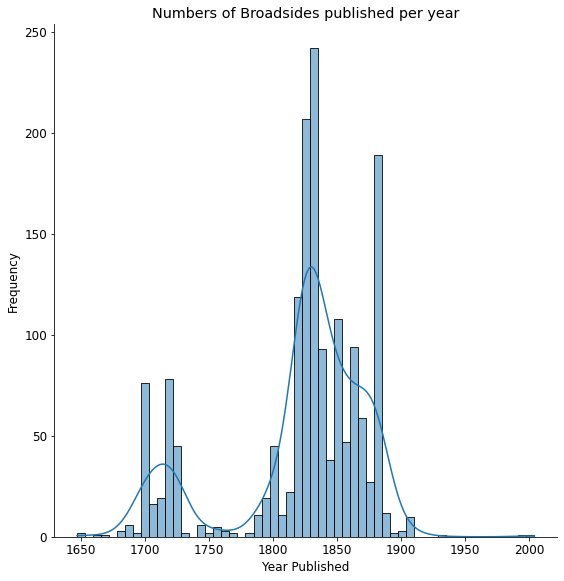

In [109]:
year_dis = sns.displot(metadata_df['date_issued'], height=8, aspect=1, kde=True)
year_dis.set(xlabel='Year Published', ylabel='Frequency')
sns.set_style("white")

plt.title("Numbers of Broadsides published per year")
plt.show()

The `displot` puts the years into 'bins', meaning each bar on the graph represents a collection of 5 years. This makes it easier to look at as we can see the entire graph at once and allows addition of a trend line so we can see how the number of Broadsides published changed over time. 

This is a more useful interpretation of the data. From the previous visualisation we saw that the year 1880 had the greatest number of Broadsides published, despite this being true, this plots shows us that the time period around 1880 **was not** actually the peak of the publications. This graph instead shows that *cumulatively*, the years around 1825 **was** the peak of the Broadsides publications.

#### 5.5 Looking at trends over time

So, we have an idea for the trends within each column in the metadata, now we can dive a little deeper and take a look at the potential relationship *between* the different variables. For example, we can combine the **place** metadata with the **date_issued** metadata to see whether the publishing locations changed over time.

We will do this using a `catplot`:

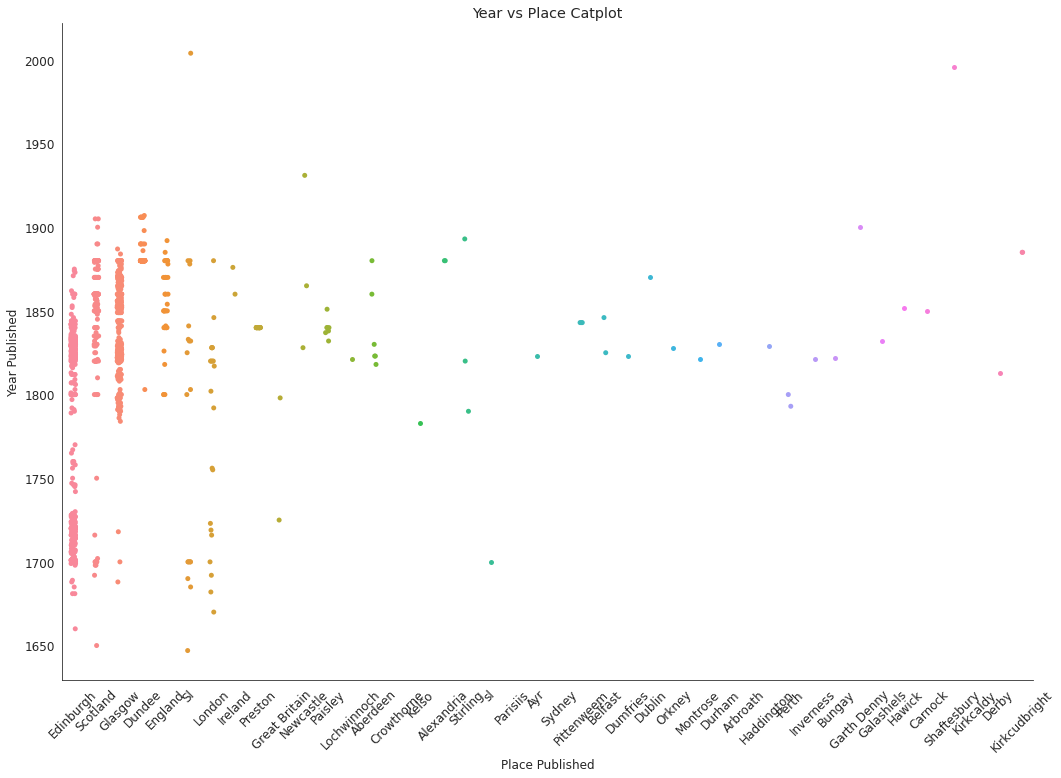

In [110]:
metadata_none_df = metadata_df.replace({np.nan: None})


year_vs_place = sns.catplot(data=metadata_none_df, x='place', y='date_issued', height=10, aspect=1.5)
year_vs_place.set(xlabel='Place Published', ylabel='Year Published', title='Year vs Place Catplot')
plt.xticks(rotation=45)
plt.show()

This graph gives us an insight into the publishing locations over time. We can see that earlier on, between around 1700-1750, the majority of the Broadsides were published in Edinburgh. In fact, publishing in Glasgow doesn't seem to take off until almost 1800. 

This gives us a better understanding of the relationship between these two variables compared to when we looked at both independently.

Finally, it would be good to look at how the locations mentioned in the Broadsides titles change over time, and then we can see how similar this is to the publishing locations. To do this we need to **merge** the *title_locations* dataframe with the *metadata* dataframe, so that we can associate the lcoations with the years issued. To do this we use `pd.merge` with the parameter `how='left'` - this means that it will merge using only the keys from the `left` dataframe and will therefore only contain the file IDs that had a location mentioned in their title:

In [111]:
# Merge using how='left' 
locations_metadata_df = pd.merge(left=title_locations_df, right=metadata_df, how='left', on='fileid')
locations_metadata_df

,fileid,title_x,location,location_str,id,title_y,language_term,form,place,place_code,...,topic7,topic8,person1,person1_title,person2,person2_title,person3,person3_title,person4,person4_title
0,74459905.txt,Ayr Autumn Circuit - L.C.Fol.73(123),[Ayr],Ayr,74459905,Ayr Autumn Circuit,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,74459907.txt,"Circuit Court : Glasgow, 15th Sept. 1828 - L.C...",[Glasgow],Glasgow,74459907,Circuit Court,eng,print,Glasgow,stk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,74459909.txt,Trials & sentences of all the different prison...,[Glasgow],Glasgow,74459909,Trials & sentences of all the different prison...,eng,print,Glasgow,stk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,74459912.txt,Account of the trials and sentences of all the...,[Glasgow],Glasgow,74459912,Glasgow circuit,eng,print,Glasgow,stk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,74459913.txt,Particular account of the procedure of the Cir...,[Glasgow],Glasgow,74459913,particular account of the procedure of the Cir...,eng,print,Glasgow,stk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448,74460372.txt,Full and particular account of the loss of the...,[Leith],Leith,74460372,Minerva of Leith! A full and particular accoun...,eng,print,Edinburgh,stk,...,NaN,NaN,"Minerva, Brig.",NaN,NaN,NaN,NaN,NaN,NaN,NaN
449,74460385.txt,Account of the shocking case of Mrs Anderson S...,[Leith],Leith,74460385,Murder. An account of the shocking case of Mrs...,eng,print,Edinburgh,stk,...,NaN,NaN,Anderson,"Mrs., of Leith",NaN,NaN,NaN,NaN,NaN,NaN
450,74460386.txt,"Full, true and particular account of that most...","[Dunbar, Edinburgh]","Dunbar,Edinburgh",74460386,Murder,eng,print,Edinburgh,stk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,74460392.txt,Full true and particular account of the murder...,"[Edinburgh, Musselburgh]","Edinburgh,Musselburgh",74460392,"Murder, &c. A full, true and particular accoun...",eng,print,Edinburgh,stk,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are only 453 rows in this dataframe, which tells us we have successfully only selected the file IDs from the original `title_locations_df`.

We can now create a similar `catplot` as above to compare the places mentioned over time:

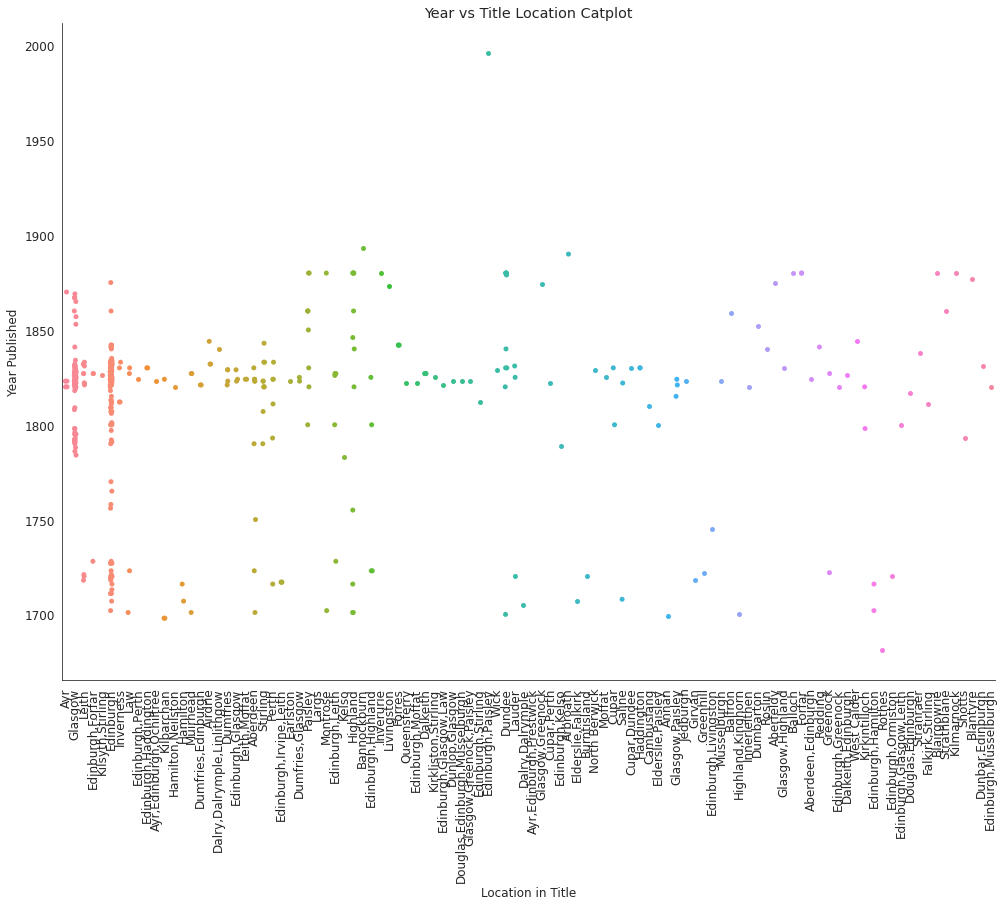

In [112]:
locations_metadata_none_df = locations_metadata_df.replace({np.nan: None})

year_vs_title = sns.catplot(data=locations_metadata_none_df, x='location_str', y='date_issued', height=10, aspect=1.5)
year_vs_title.set(xlabel='Location in Title', ylabel='Year Published', title='Year vs Title Location Catplot')
plt.xticks(rotation=90)
plt.show()

Interestingly, this graph shows that the use of 'Glasgow' in the title didn't take off until around 1800, whereas the use of 'Edinburgh' in the title was popular from much earlier, around 1700. This is a similar trend to the findings of the publishing location over time and might indicate a correlation between the place a Broadside was published and the location it mentions in its title.

### 6. Hypotheses and Reflection

#### 6.1 Hypothesis 1

My first hypothesis is that there is a large amount of data missing from *The Broadsides* dataset. 

There is a major gap in the number of Broadsides in the dataset published between approximately 1730 and 1790 as shown in [5.4 Dates of Broadsides publication](#5.4-Dates-of-Broadsides-publication). This could potentially be due to the Jacobite rising of 1745 (https://en.wikipedia.org/wiki/Jacobite_rising_of_1745), a major historical event at the time, but I don't think this could explain a gap of 60 years. I think it is mrore likely that our dataset is merely a sample of the Broadsides that existed at the time.

We could ask the National Library of Scotland whether they have a figure for the approximate number of Broadsides that would've been published during this period to get an idea of the sample size of our dataset.

#### 6.2 Hypothesis 2

My second hypothesis is that the **text** locations would vary over time, and that they would correlate with the **title** locations.

I think this because locations were mentioned when a story or event of interest happened there. So although places like Edinburgh and Glasgow would be mentioned quite consistently over time, I think that you would see spikes over time when looking at places that are mentioned more infrequently. This might happen for example when there are a series of Broadsides published consecutively about the same event or news story.

If you were to look at the locations mentioned in the text of each fileid, and plot these over time with the corresponding metadata we would be able to see these trends. To do this I would need to adjust the method I used above to find the locations in the text, so that these could also be associated with the appropriate file ID.

#### 6.3 Hypothesis 3

My final hypothesis is that there is a correlation between the place that a Broadside was published, and the location mentioned in both the **title** and the **text**.

My final two catplots show similar trends when looking at the places that Broadsides were published and the locations mentioned in the titles, over time. This might be because at the time communities were a lot mroe localised. Therefore, the news that they were interested in would be more localised and the Broadsides published in a particular area would therefore be telling stories about events in that same area. Additionally, journalists in a particular lcoation would be writing about the places they lived in.

To investigate this hypothesis I would need to plot both variable onto the same graph, such as a heatmap, to see if there is a correlation. I could also combine this with the locations mentioned in text over time, once I have extracted and combined this data.

#### 6.4 Reflection

This experience has taught me a great deal about the different ways you can explore data. Initially, I found it difficult to think about the text files themselves as the **dataset** rather than thinking about the metadata as the dataset. This opportunity has allowed me to develop skills in Natural Language Processing as well as develop my ability to think of different questions we can ask about a dataset. I have improved by ability to write functions and create for loops, and test these using assertions where appropriate. I am impressed by how much my coding skills have progressed over the past 2 months.